In [1]:
#Descargar el archivo GCB2022v27_MtCO2_flat.csv de kaggle

#Explorar el dataset

#desplegar nombres de columnas
#tipo de datos
#distribucion de NaNs
#¿De cuántos países diferentes hay datos?

#Graficar los valores globales y los de Mexico para: 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

#Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.

#Cuales son los 3 países que más contaminan en cada uno de los casos?
#Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita? Eliminar NaNs.
#Aplicar merge, groupby.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [5]:
df.head()

Country ISO 3166-1 alpha-3  Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

In [6]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [7]:
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [10]:
df['Country'].unique()
#Nos muestra cuantos paises hay.

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'North Korea', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
   

In [11]:
Total = df['Country'].nunique()
print("Strings diferentes en Country: ", Total)
print("Paises totales sin considerar Global:", Total-1)

Strings diferentes en Country:  232
Paises totales sin considerar Global: 231


In [12]:
import matplotlib.pyplot as plt
#COMAPRATIVAS Y GRAFICAS DE GLOBAL VS MEXICO
Columnas = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
df_Global = df.loc[df['Country']=='Global']
df_Global

Country ISO 3166-1 alpha-3  Year         Total          Coal  \
62832  Global                WLD  1750      9.350528      9.350528   
62833  Global                WLD  1751      9.350528      9.350528   
62834  Global                WLD  1752      9.354192      9.354192   
62835  Global                WLD  1753      9.354192      9.354192   
62836  Global                WLD  1754      9.357856      9.357856   
...       ...                ...   ...           ...           ...   
63099  Global                WLD  2017  36096.739276  14506.973805   
63100  Global                WLD  2018  36826.506600  14746.830688   
63101  Global                WLD  2019  37082.558969  14725.978025   
63102  Global                WLD  2020  35264.085734  14174.564010   
63103  Global                WLD  2021  37123.850352  14979.598083   

                Oil          Gas       Cement     Flaring       Other  \
62832           NaN          NaN          NaN         NaN         NaN   
62833           NaN          NaN          NaN         NaN         NaN   
62834           NaN          NaN          NaN         NaN         NaN   
62835           NaN          NaN          NaN         NaN         NaN   
62836           NaN          NaN          NaN         NaN         NaN   
...             ...          ...          ...         ...         ...   
63099  12242.627935  7144.928128  1507.923185  391.992176  302.294047   
63100  12266.016285  7529.846784  1569.218392  412.115746  302.478706   
63101  12345.653374  7647.528220  1617.506786  439.253991  306.638573   
63102  11191.808551  7556.290283  1637.537532  407.583673  296.301685   
63103  11837.159116  7921.829472  1672.592372  416.525563  296.145746   

       Per Capita  
62832    0.011492  
62833    0.011438  
62834    0.011390  
62835    0.011339  
62836    0.011294  
...           ...  
63099    4.749682  
63100    4.792753  
63101    4.775633  
63102    4.497423  
63103    4.693699  

[272 rows x 11 columns]

In [13]:
df_Mexico = df.loc[df['Country']=='Mexico']
df_Mexico

Country ISO 3166-1 alpha-3  Year       Total       Coal         Oil  \
36176  Mexico                MEX  1750    0.000000        NaN         NaN   
36177  Mexico                MEX  1751    0.000000        NaN         NaN   
36178  Mexico                MEX  1752    0.000000        NaN         NaN   
36179  Mexico                MEX  1753    0.000000        NaN         NaN   
36180  Mexico                MEX  1754    0.000000        NaN         NaN   
...       ...                ...   ...         ...        ...         ...   
36443  Mexico                MEX  2017  465.620953  48.529680  245.839744   
36444  Mexico                MEX  2018  475.268909  47.313232  233.825488   
36445  Mexico                MEX  2019  472.191499  45.268010  241.897149   
36446  Mexico                MEX  2020  391.706208  20.011074  190.678139   
36447  Mexico                MEX  2021  407.205037  19.360577  195.715517   

              Gas     Cement    Flaring  Other  Per Capita  
36176         NaN        NaN        NaN    NaN         NaN  
36177         NaN        NaN        NaN    NaN         NaN  
36178         NaN        NaN        NaN    NaN         NaN  
36179         NaN        NaN        NaN    NaN         NaN  
36180         NaN        NaN        NaN    NaN         NaN  
...           ...        ...        ...    ...         ...  
36443  143.251408  20.876858   7.123264    NaN    3.790490  
36444  165.905920  20.863843   7.360426    NaN    3.832385  
36445  157.098863  19.497632   8.429845    NaN    3.774956  
36446  149.524596  20.650326  10.842073    NaN    3.108821  
36447  157.552711  22.339198  12.237033    NaN    3.213801  

[272 rows x 11 columns]

In [14]:
AGY = df_Global['Year'].to_numpy()
AMY = df_Mexico['Year'].to_numpy()
print(AMY)

[1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763
 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777
 1778 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791
 1792 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805
 1806 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819
 1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833
 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847
 1848 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861
 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875
 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889
 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903
 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917
 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931
 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945
 1946 

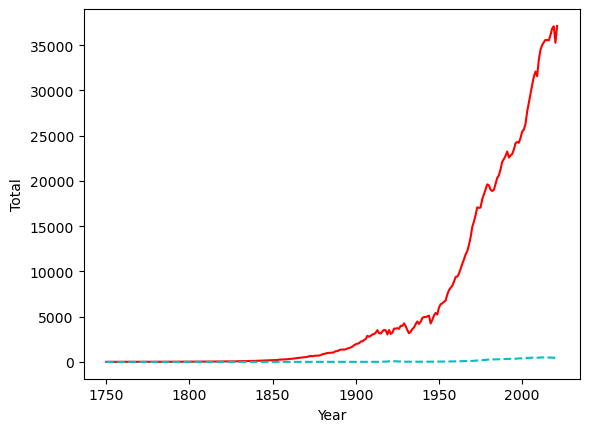

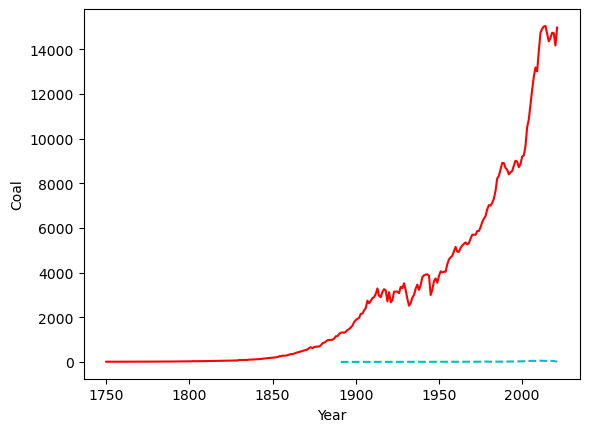

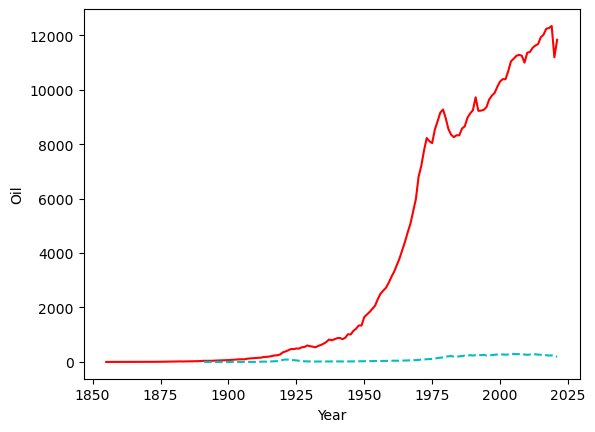

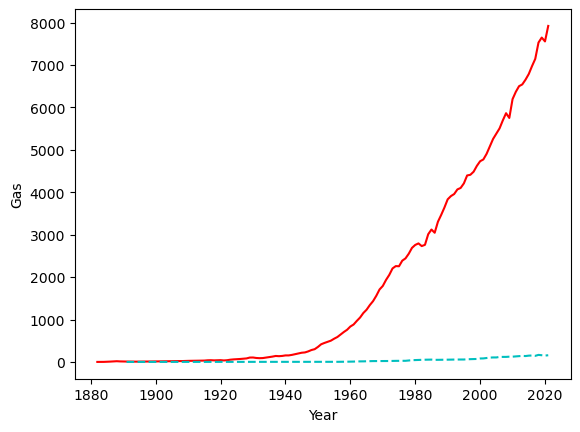

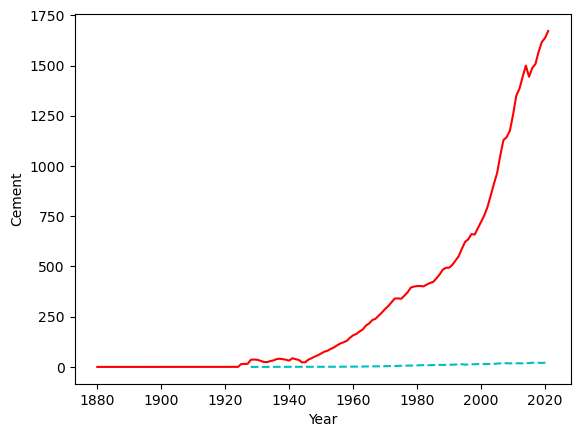

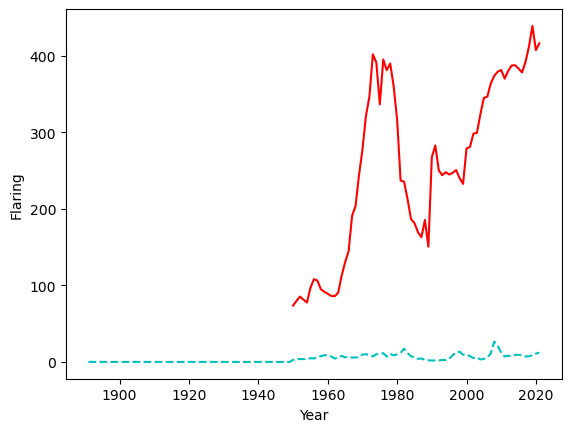

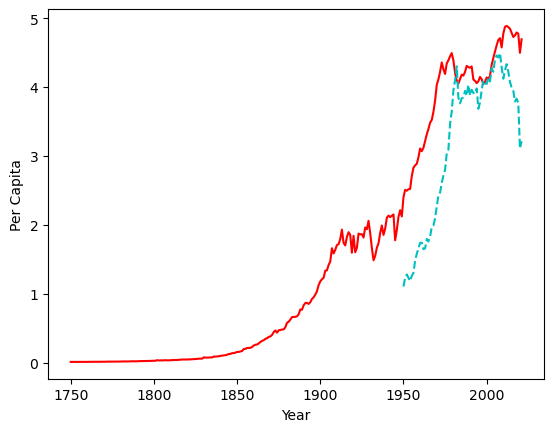

In [15]:
for i in range(len(Columnas)):
    aux_Mex =  df_Mexico[Columnas[i]]
    aux_Global = df_Global[Columnas[i]]
    A_aux_Mex = aux_Mex.to_numpy()
    A_aux_Global = aux_Global.to_numpy()
    plt.plot(AGY,A_aux_Global,'r-')
    plt.plot(AMY,A_aux_Mex,'c--')
    plt.xlabel('Year')
    plt.ylabel(Columnas[i])
    plt.show()

In [18]:
#Grafica de los top 20 paises.
G20 = np.array(['Germany', 'Saudi Arabia', 'Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'USA', 'France', 'India', 'Indonesia', 'Italy', 'Japan', 'United Kingdom', 'South Korea', 'Mexico', 'Russia', 'South Africa','Turkey'])

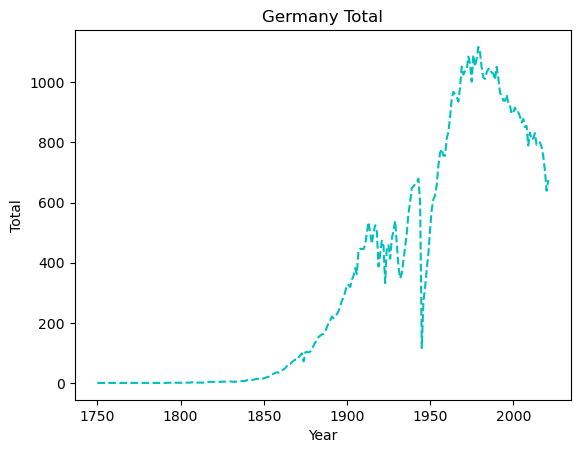

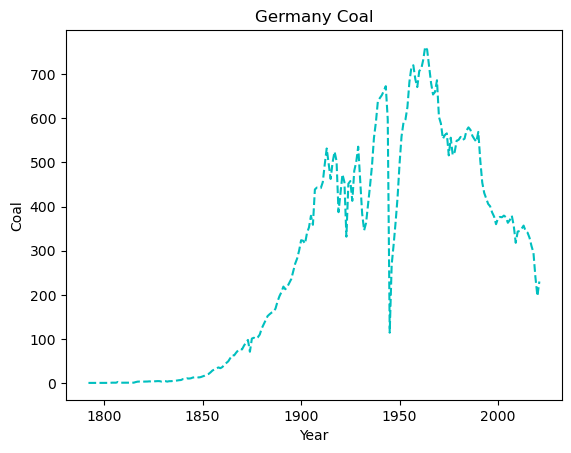

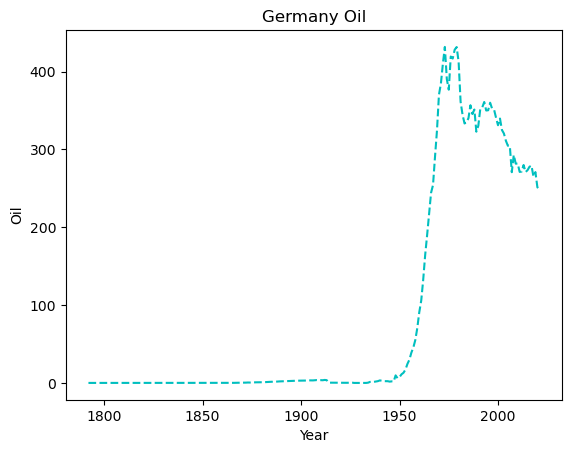

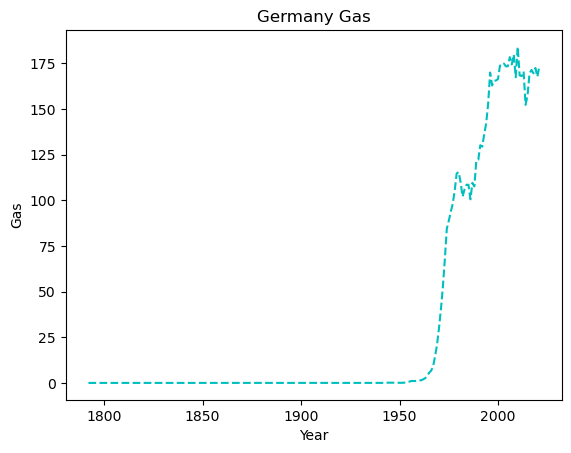

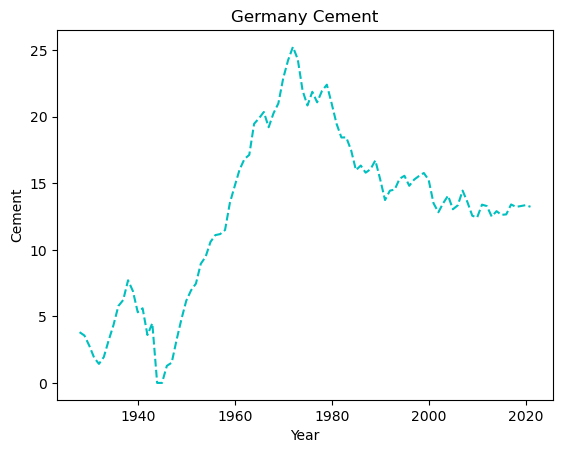

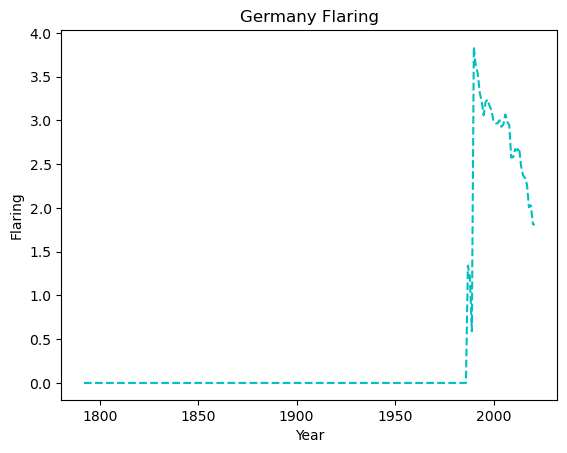

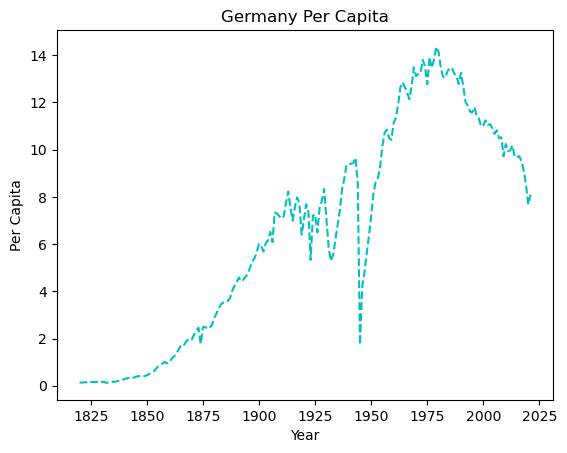

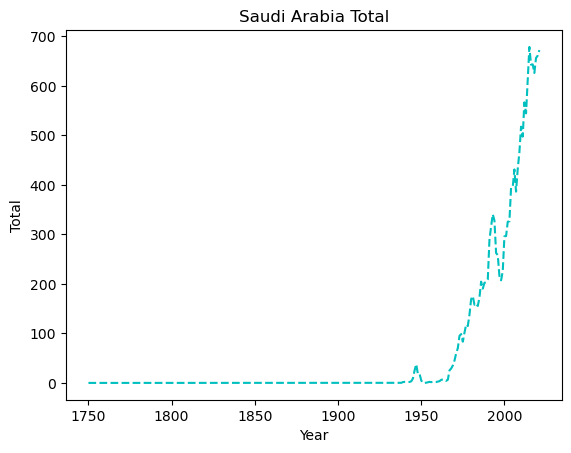

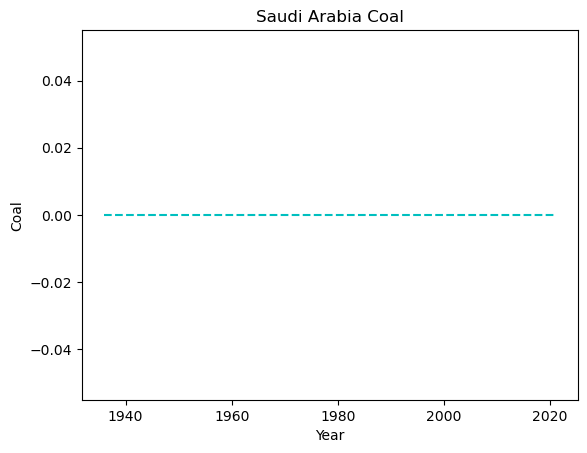

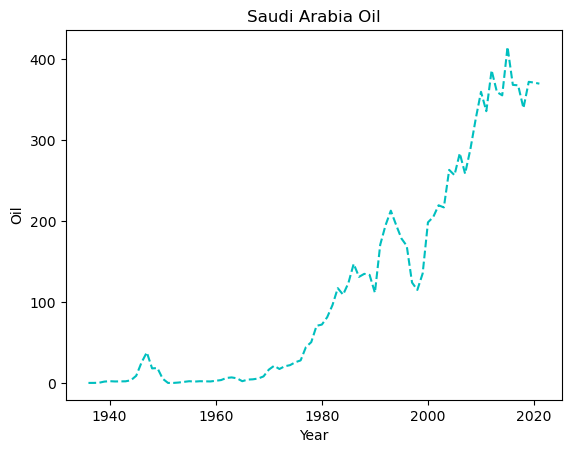

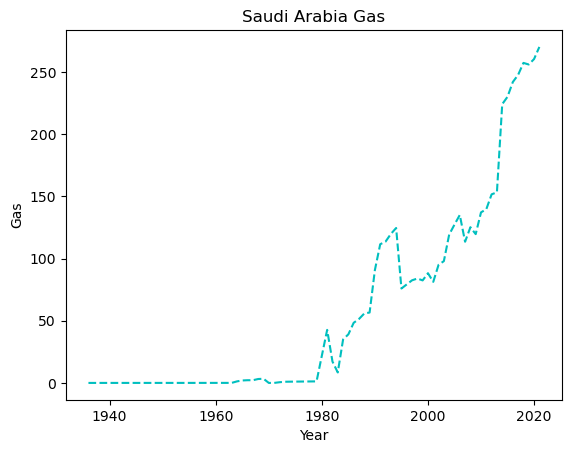

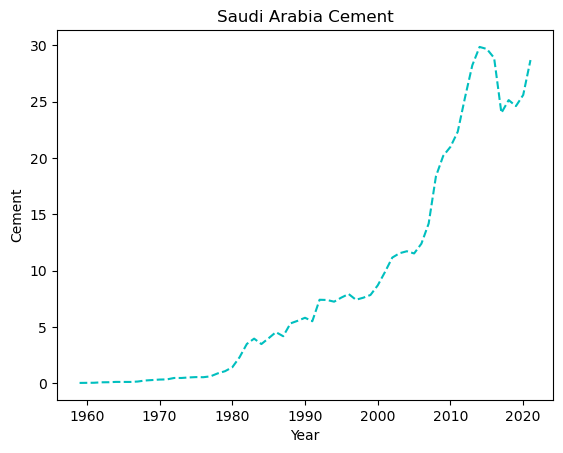

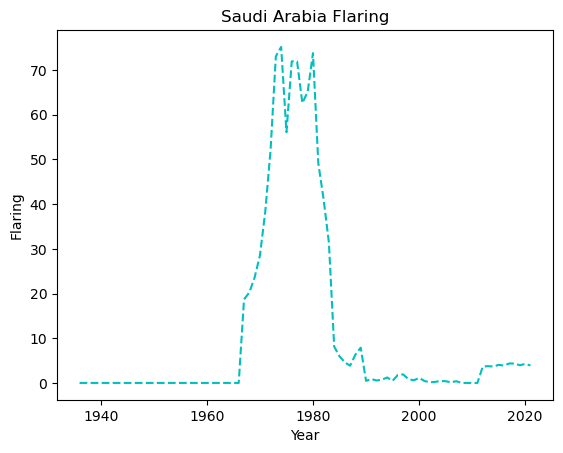

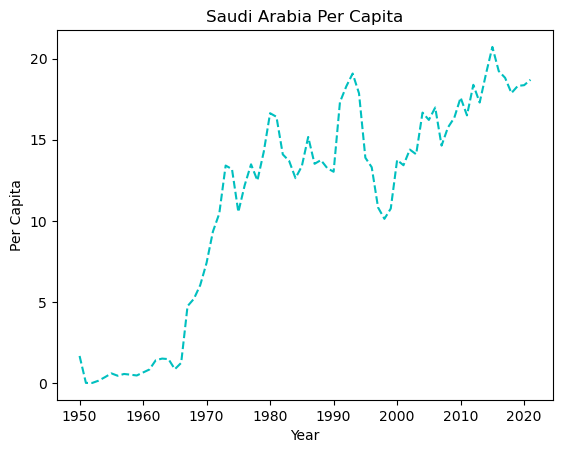

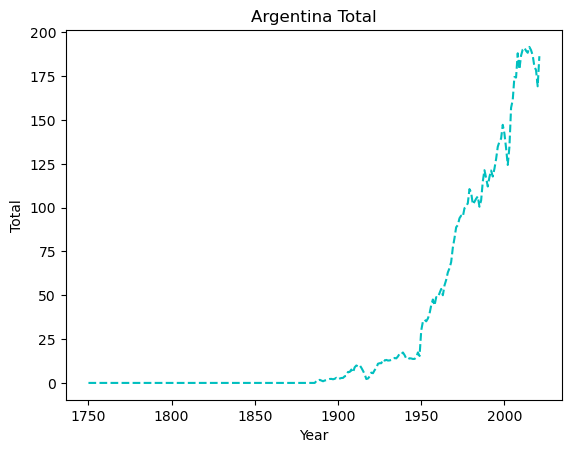

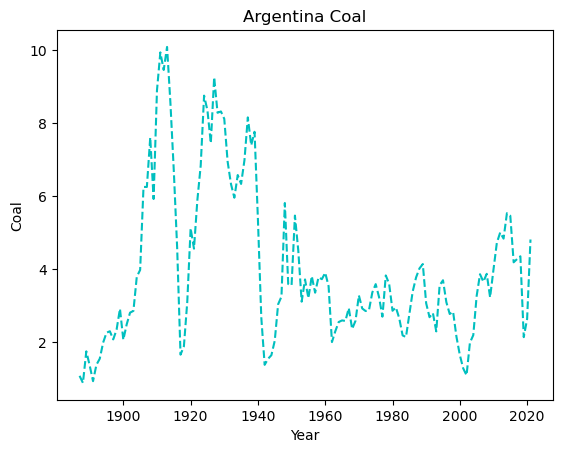

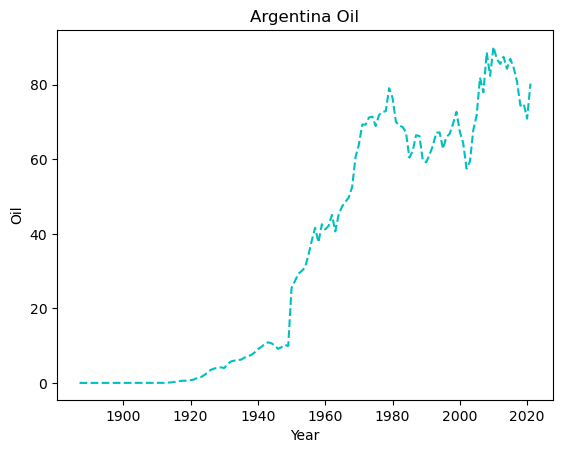

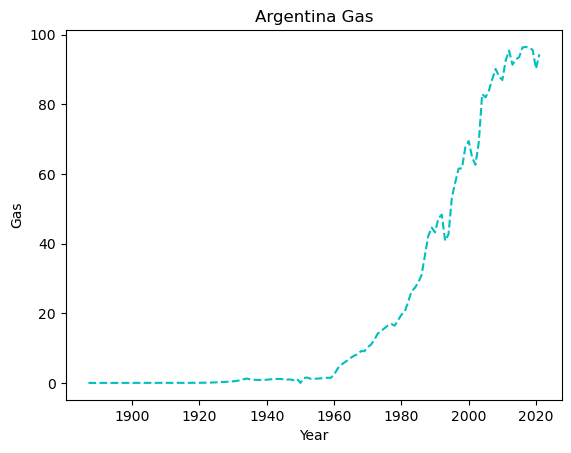

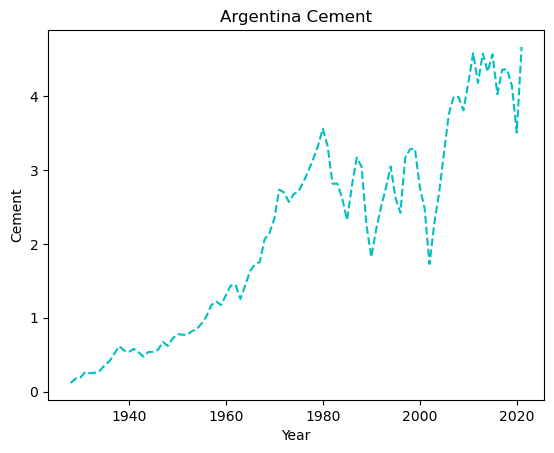

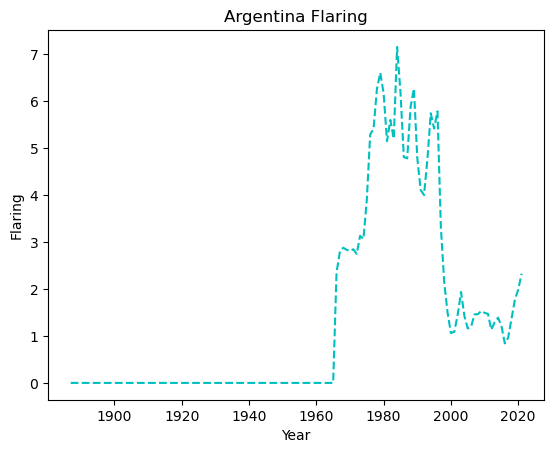

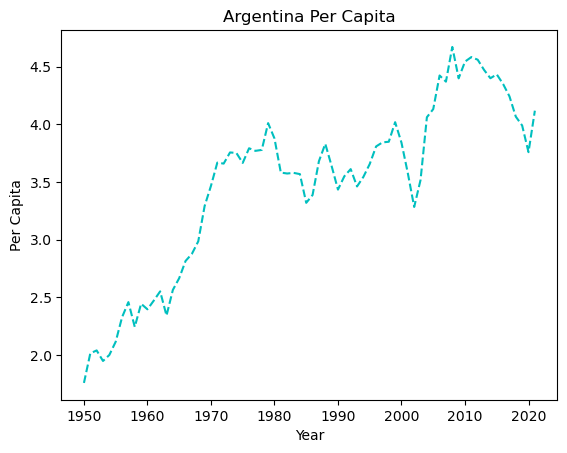

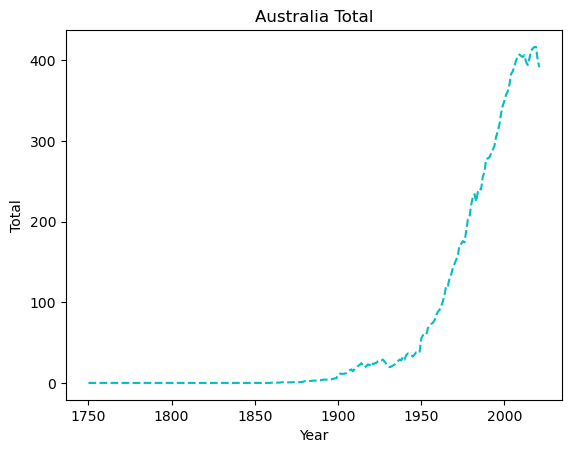

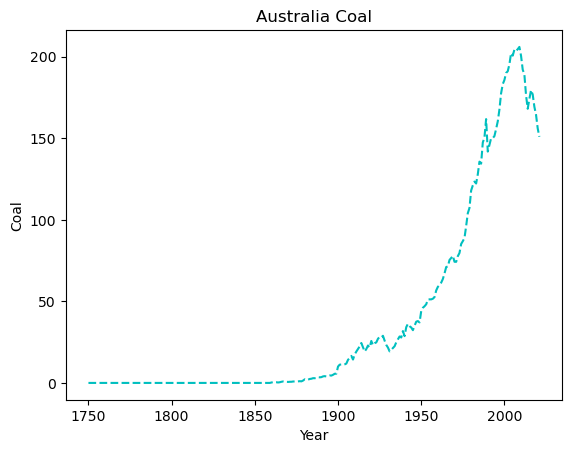

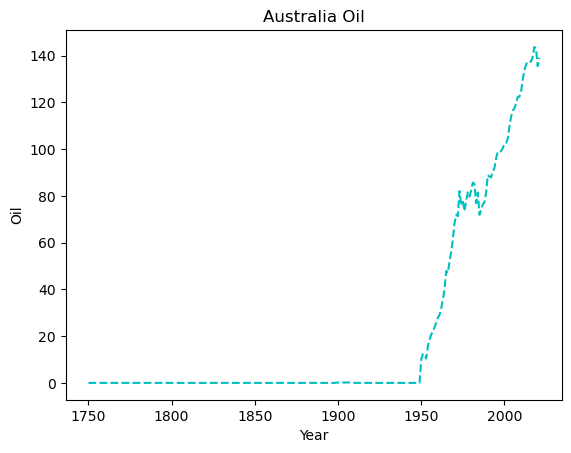

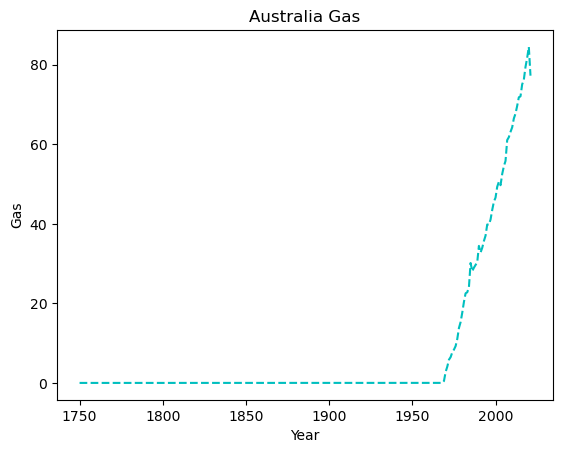

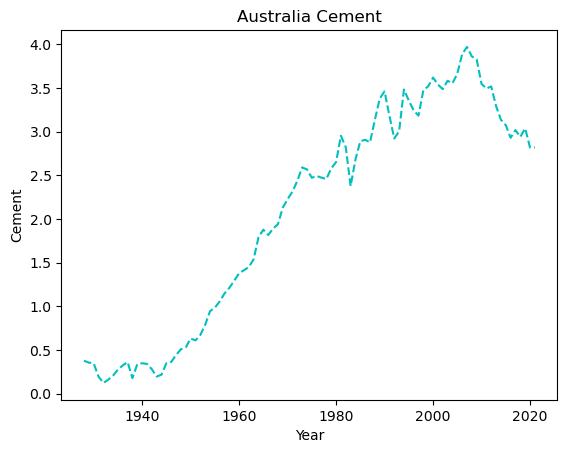

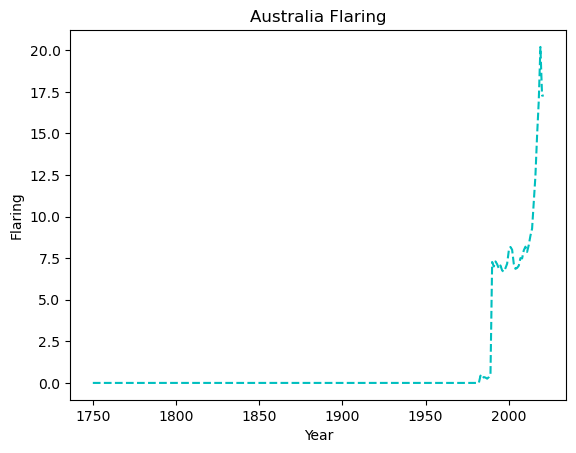

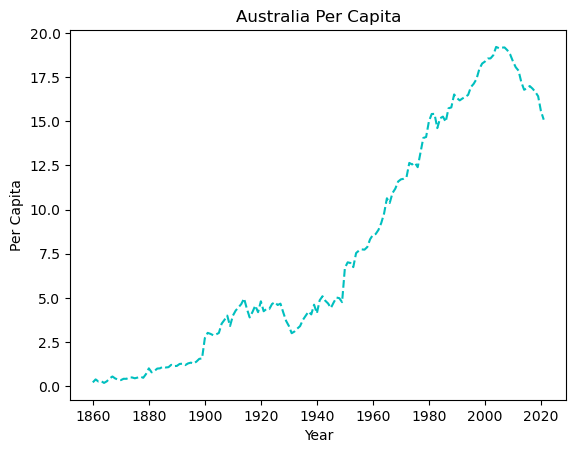

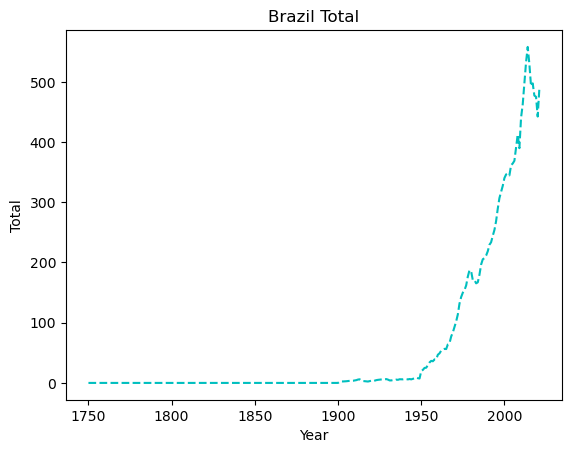

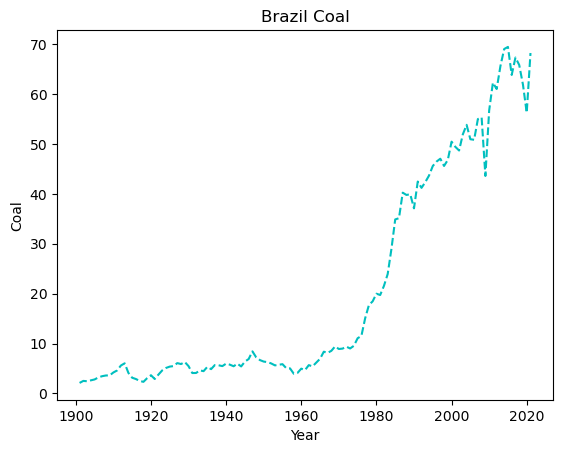

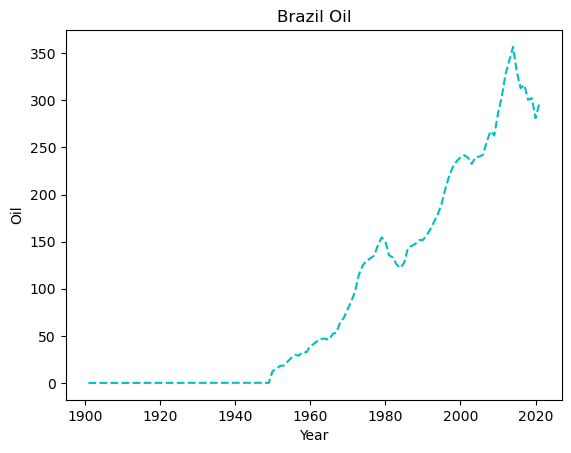

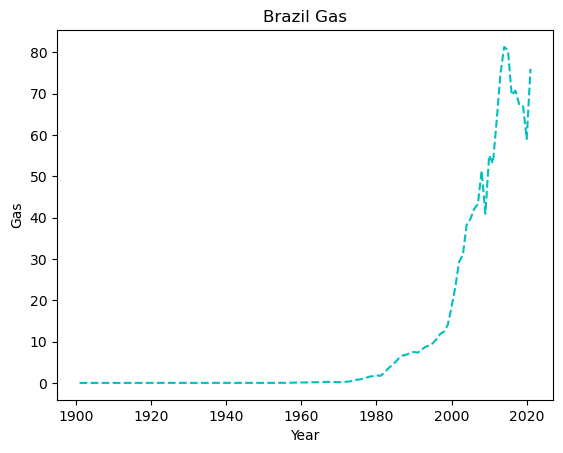

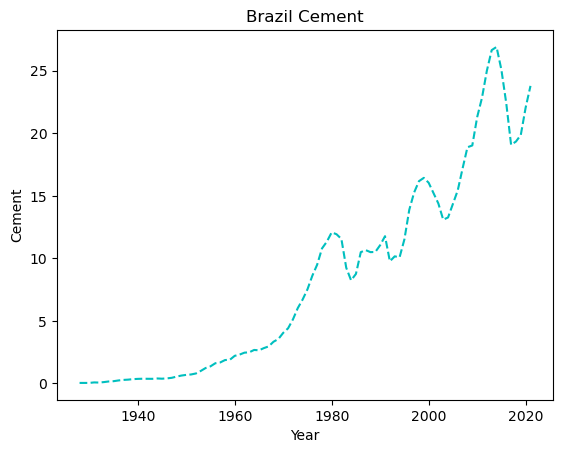

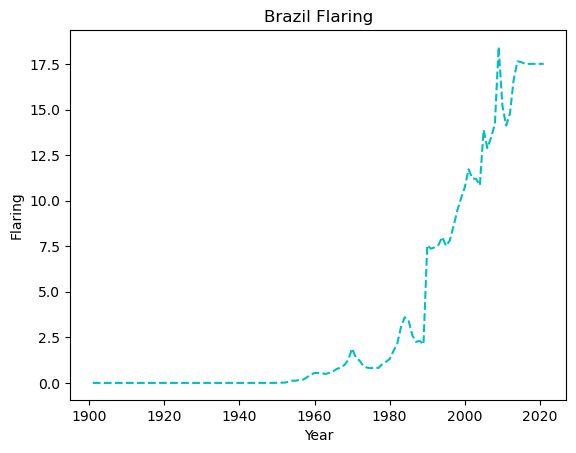

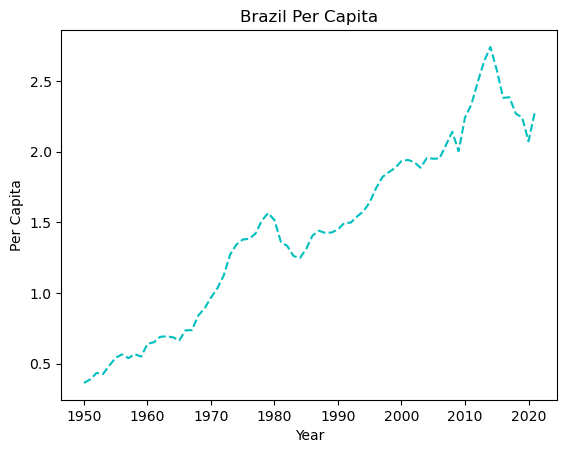

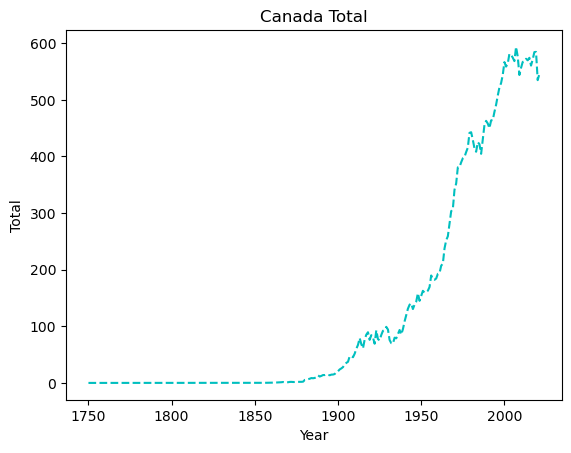

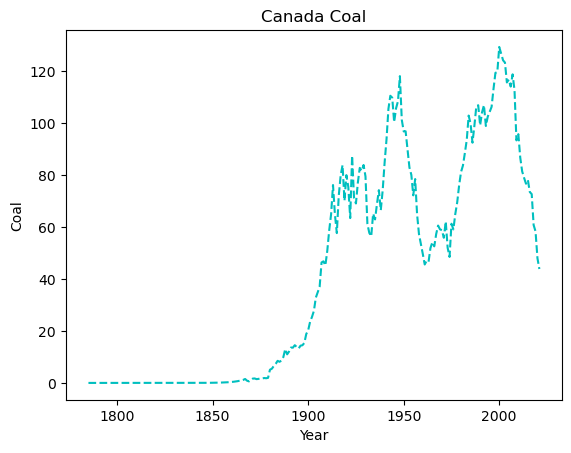

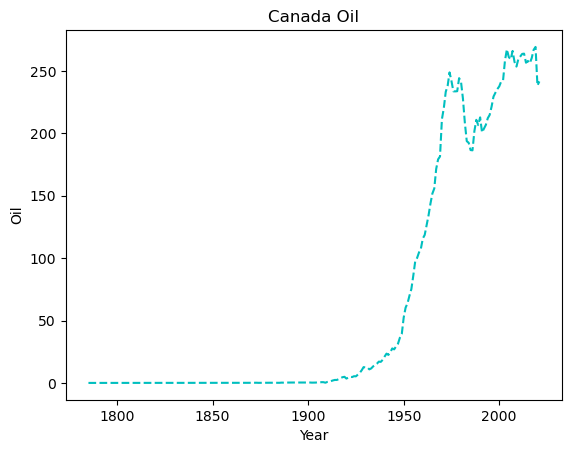

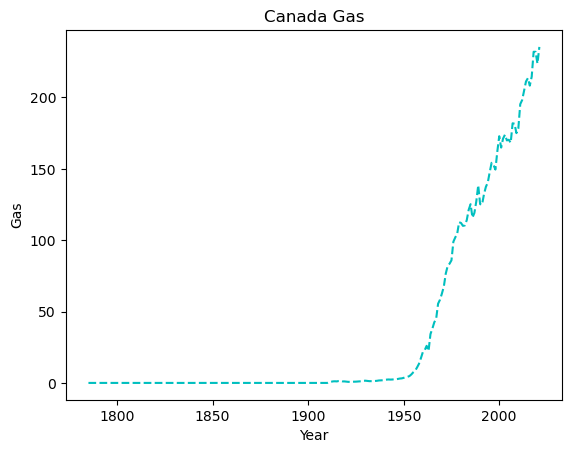

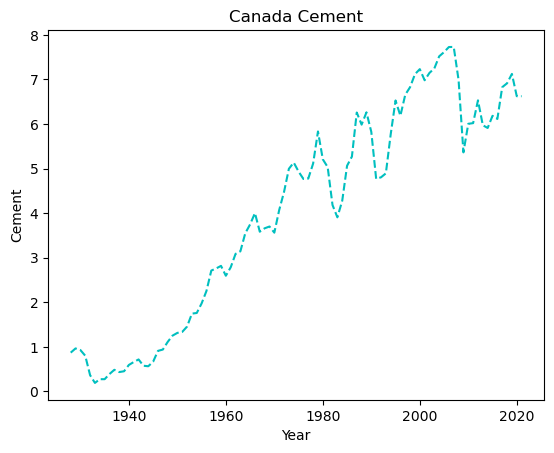

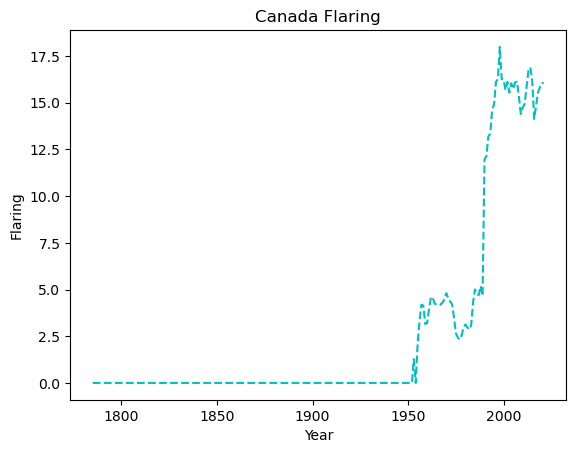

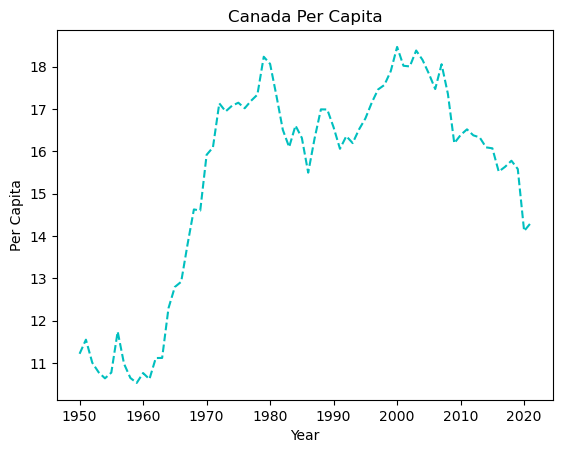

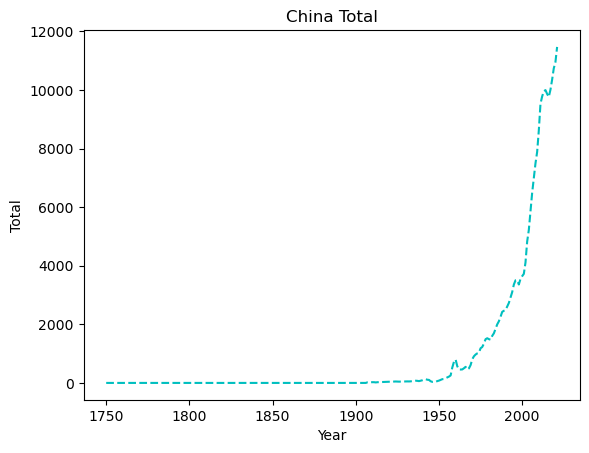

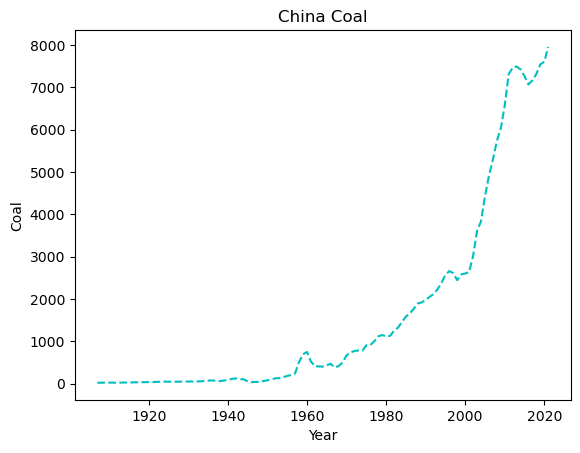

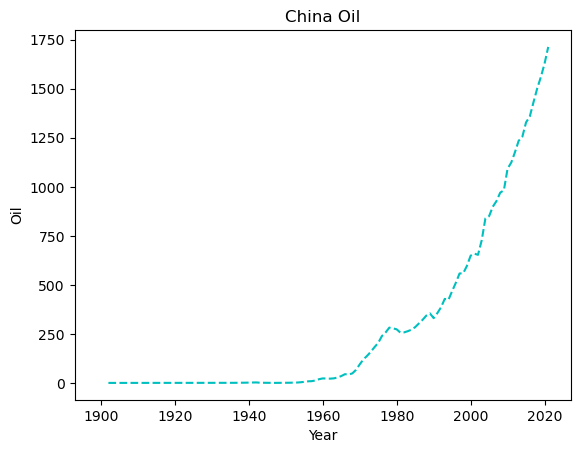

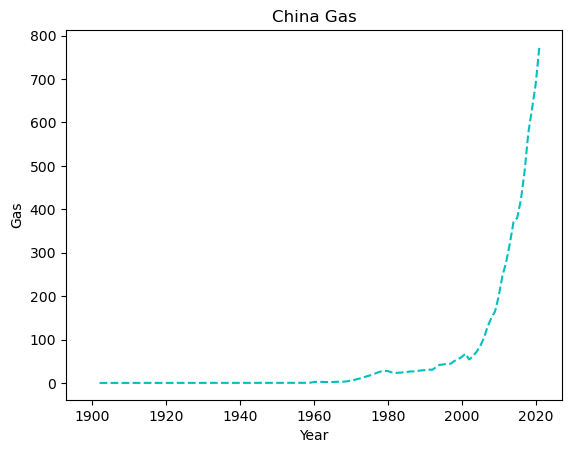

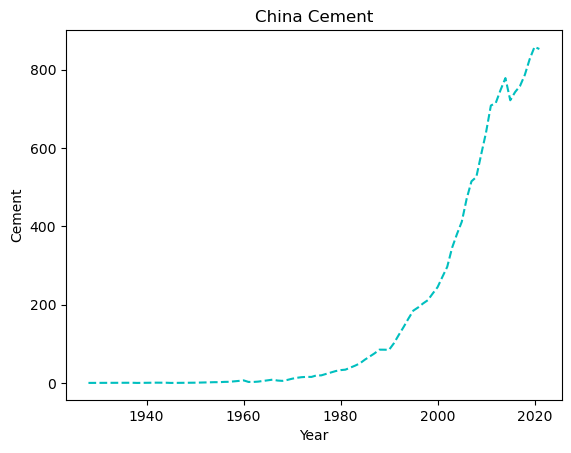

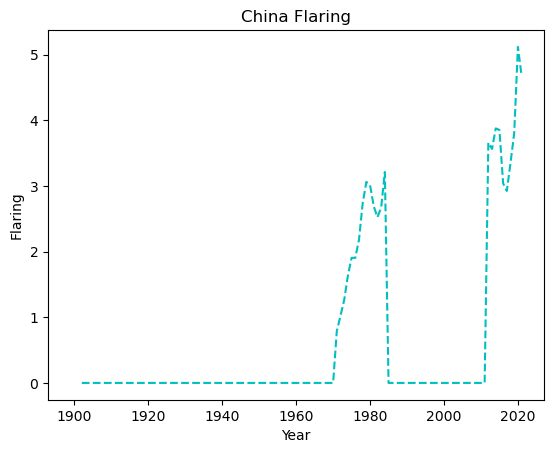

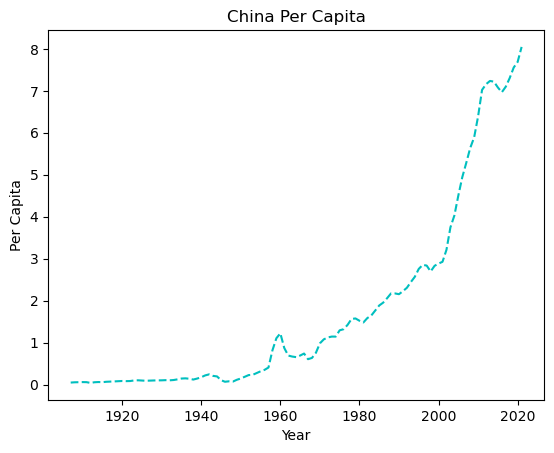

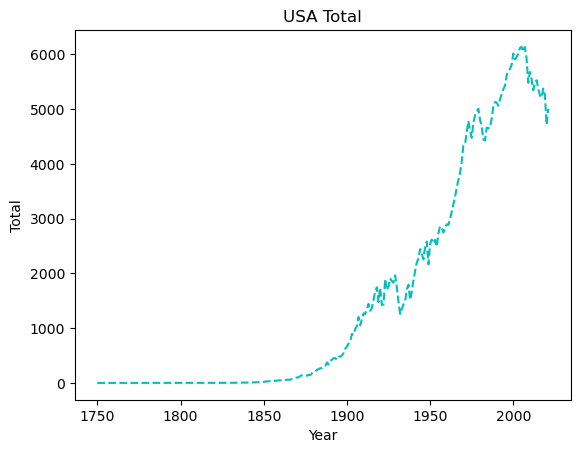

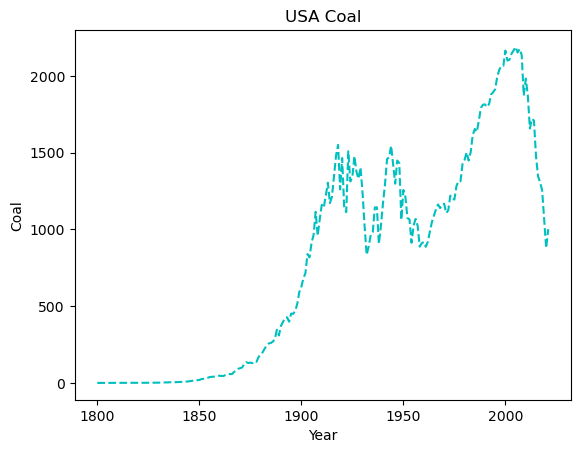

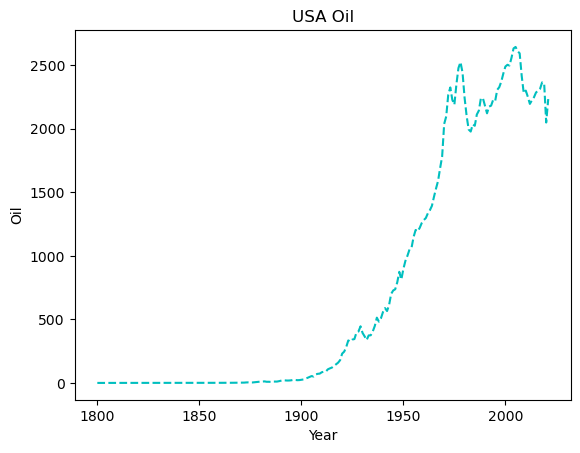

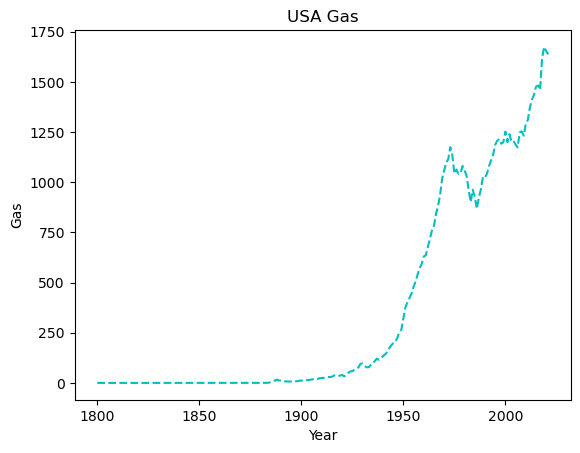

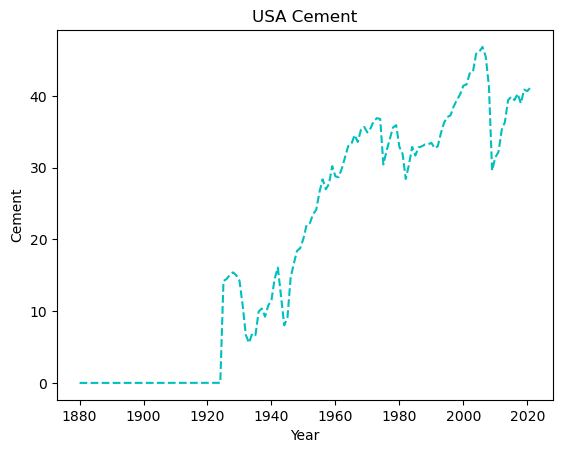

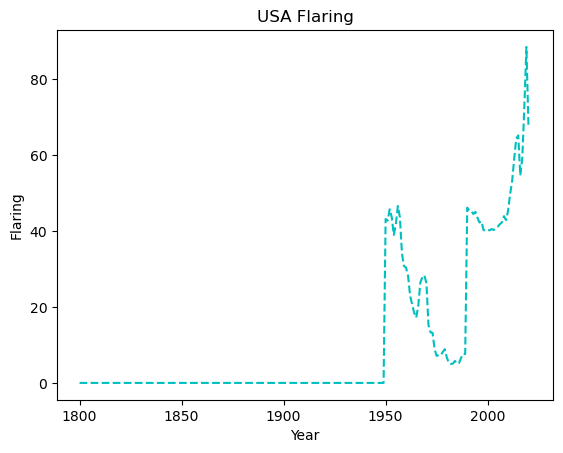

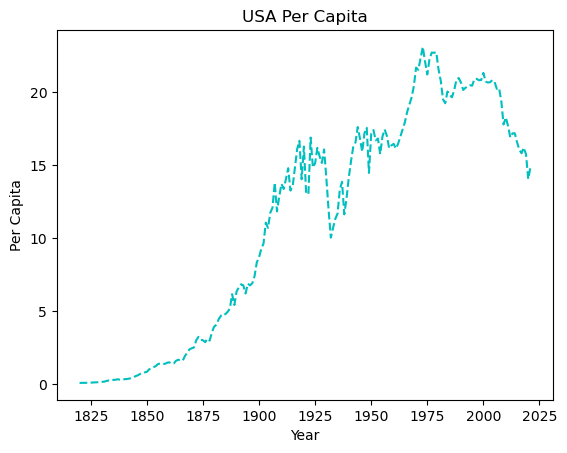

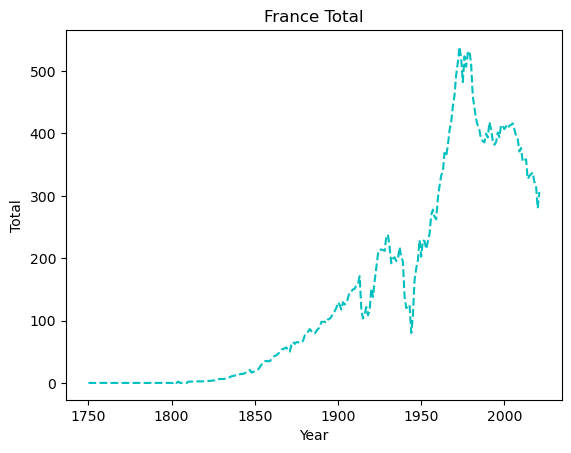

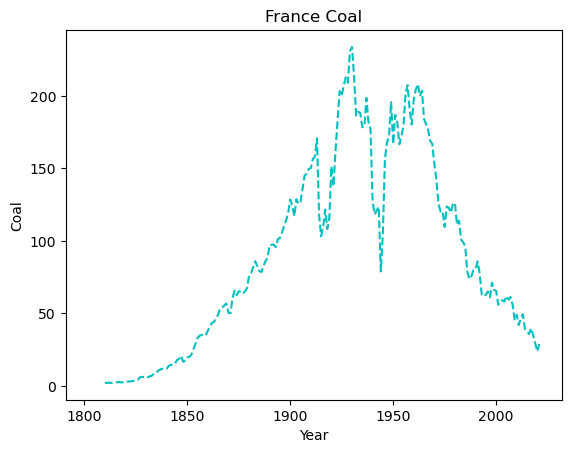

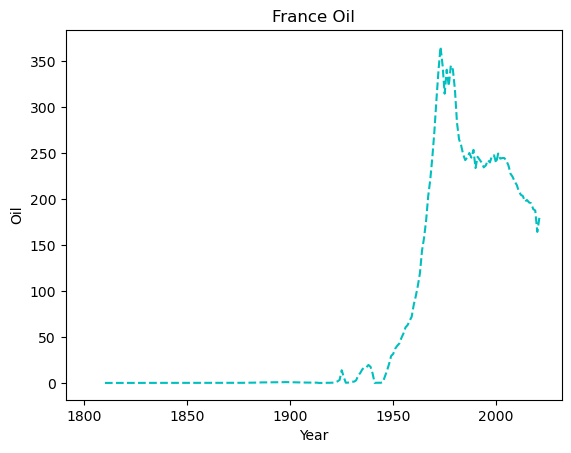

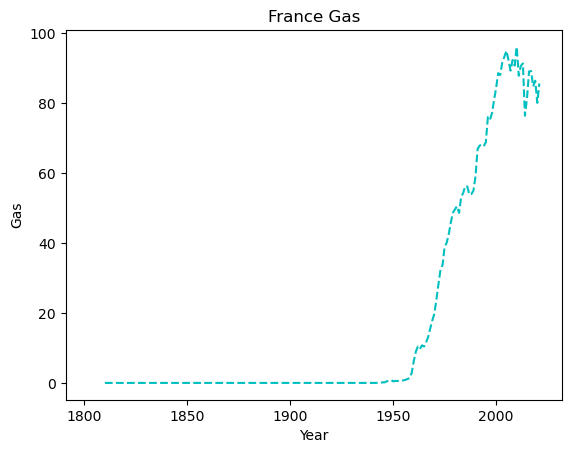

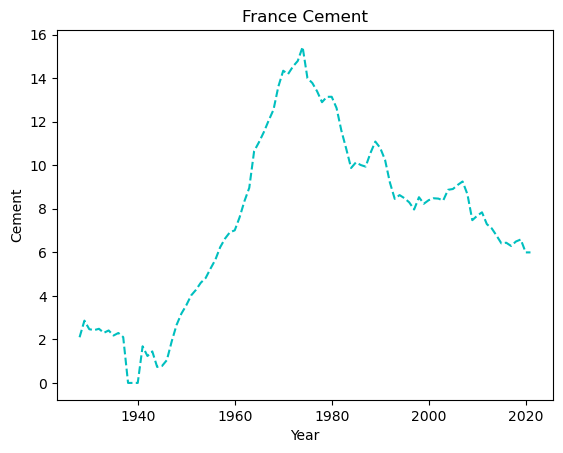

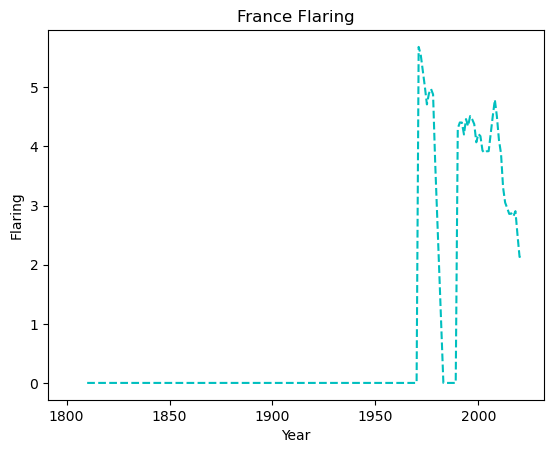

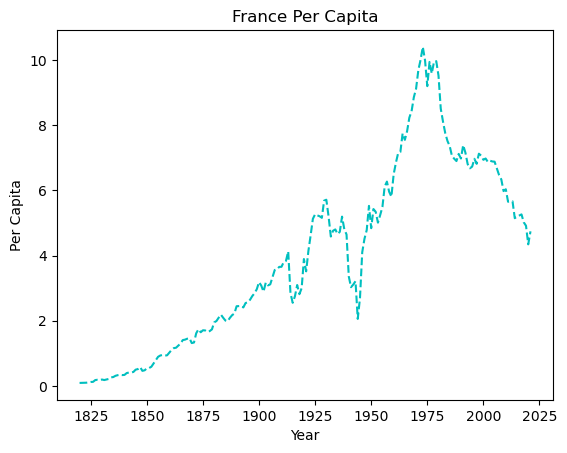

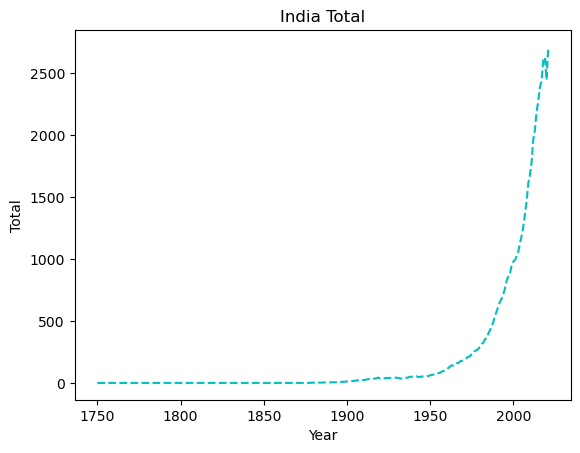

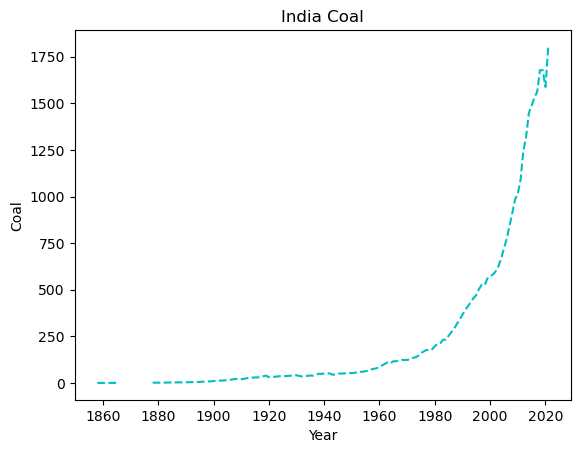

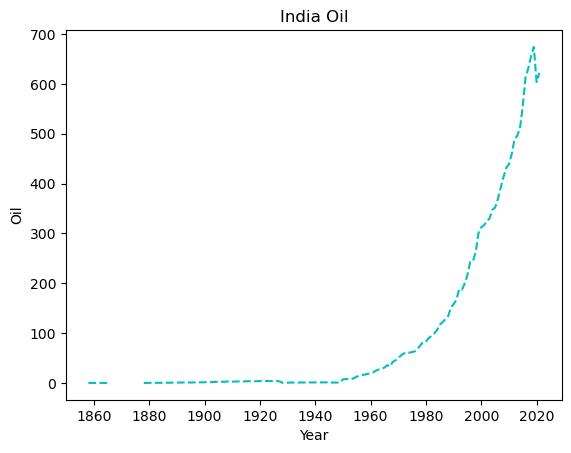

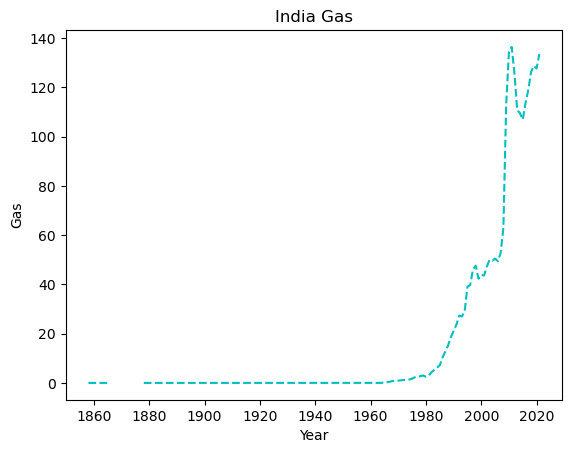

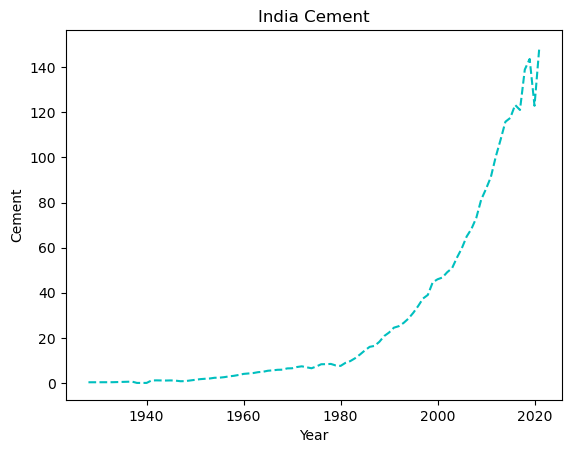

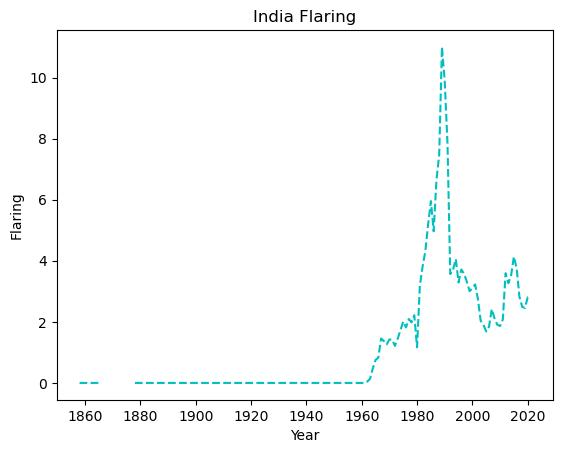

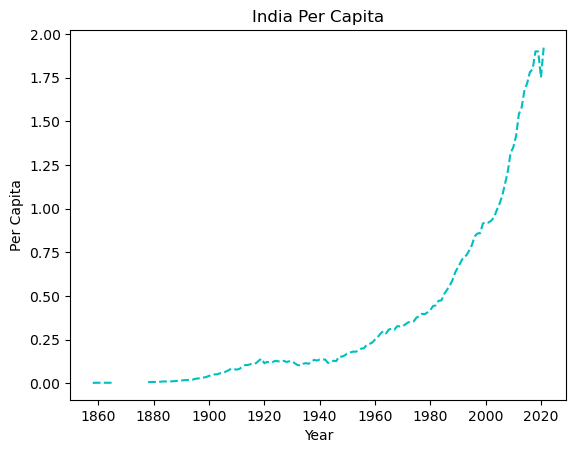

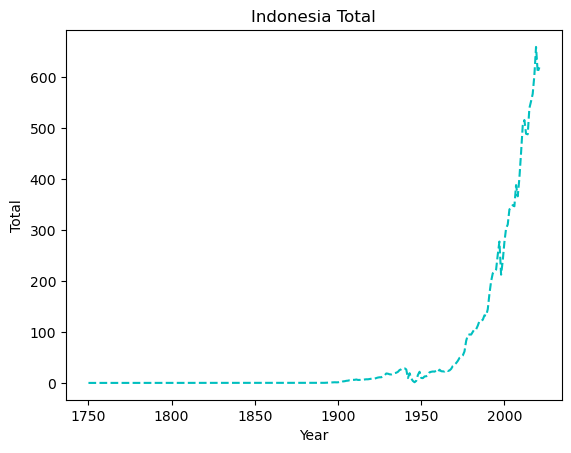

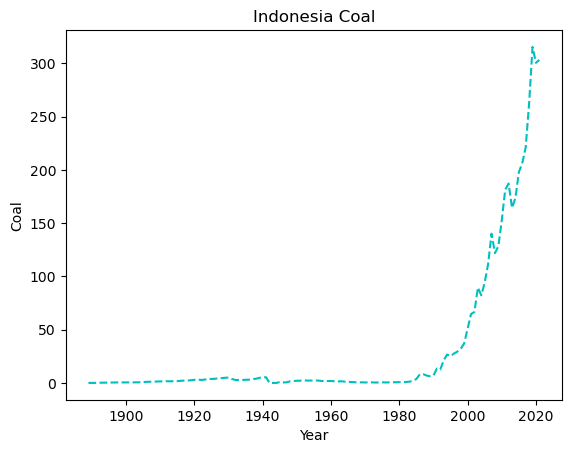

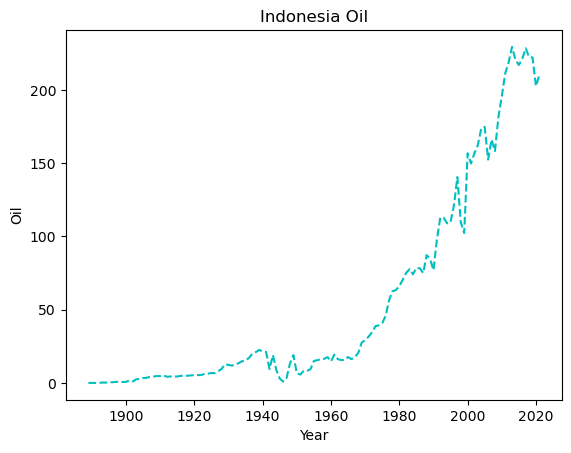

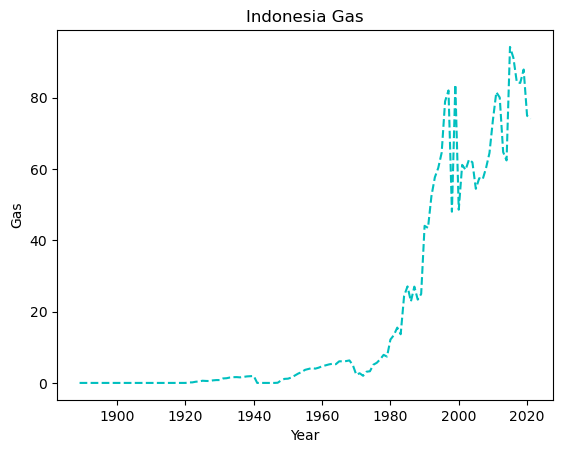

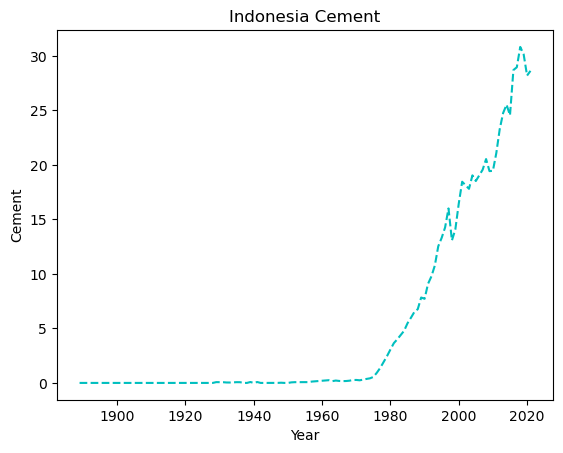

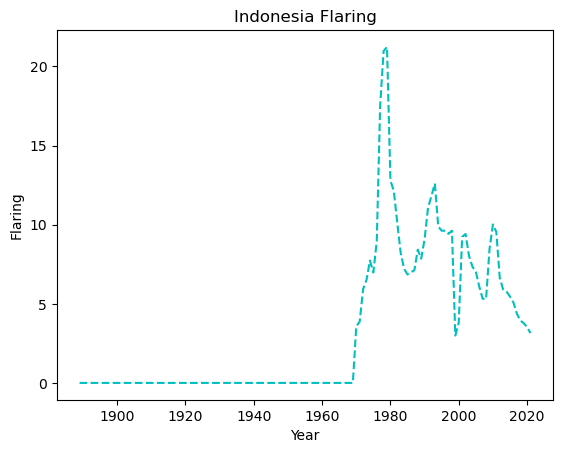

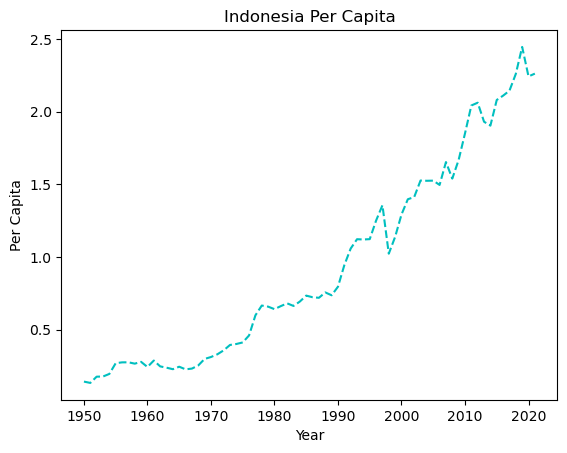

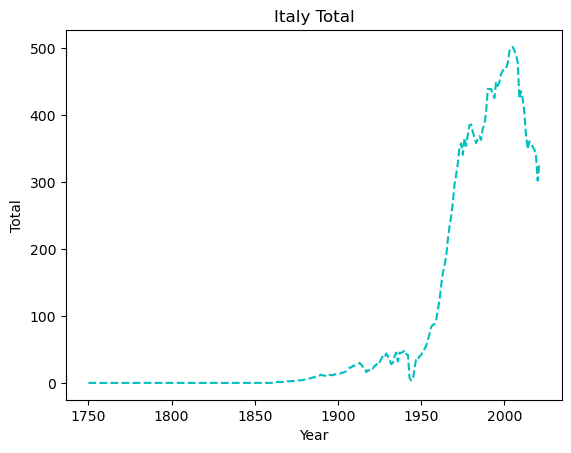

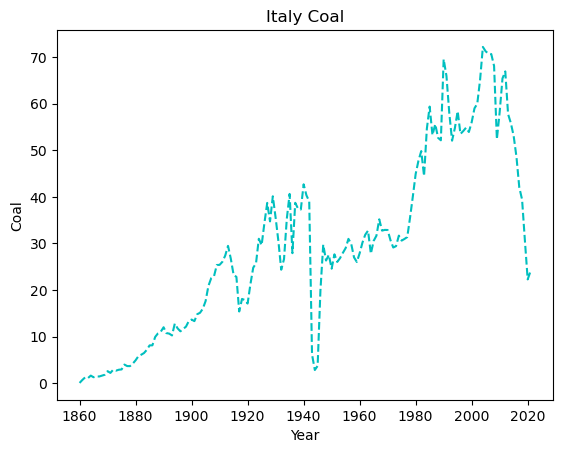

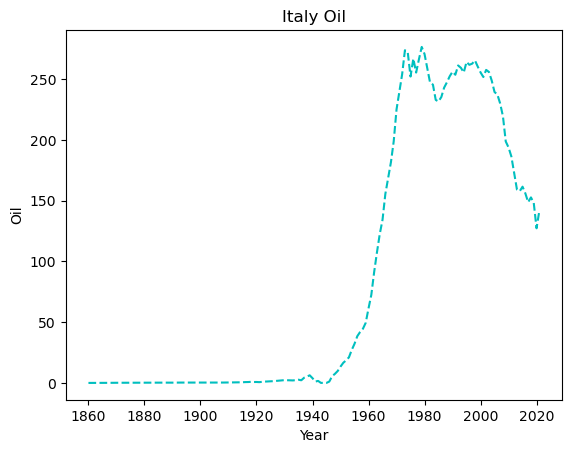

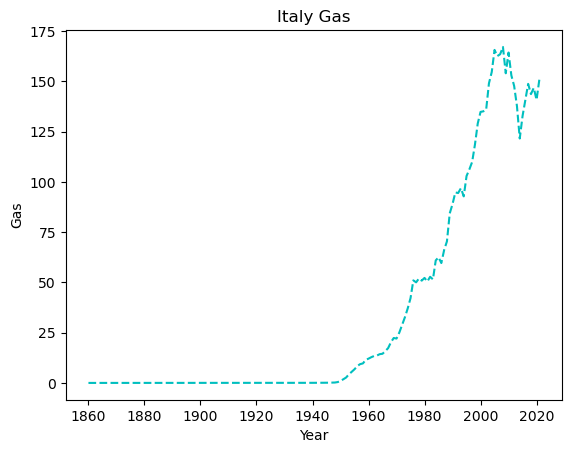

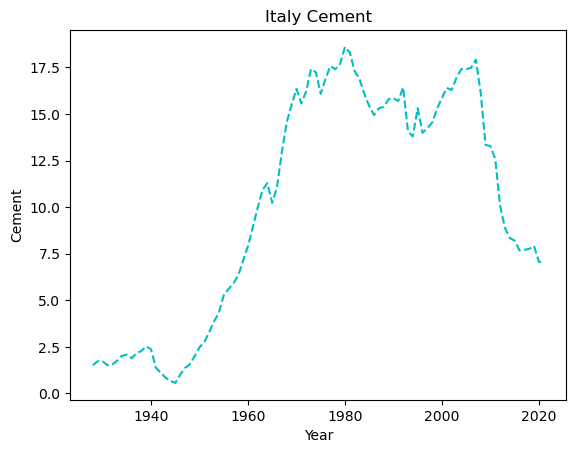

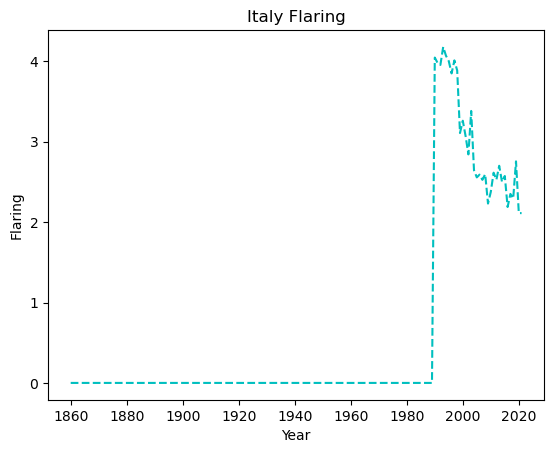

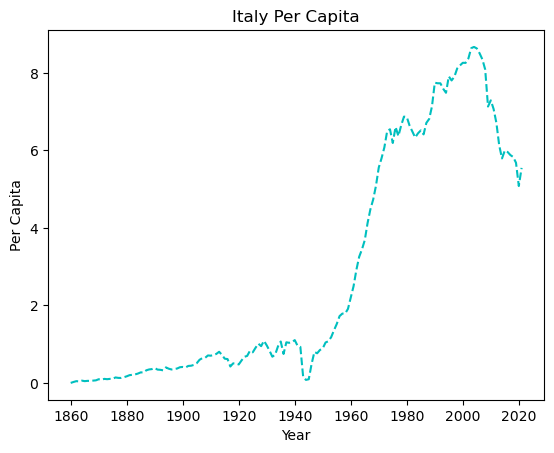

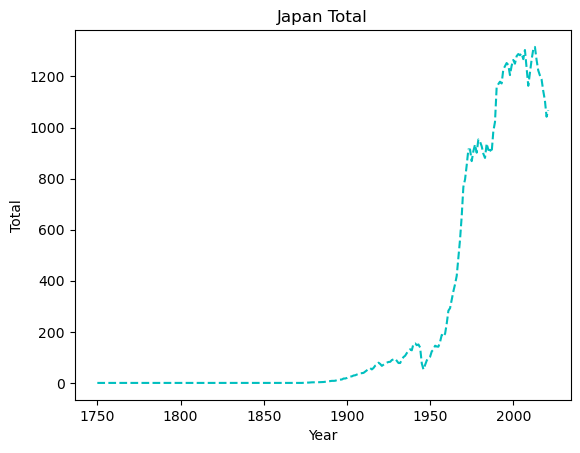

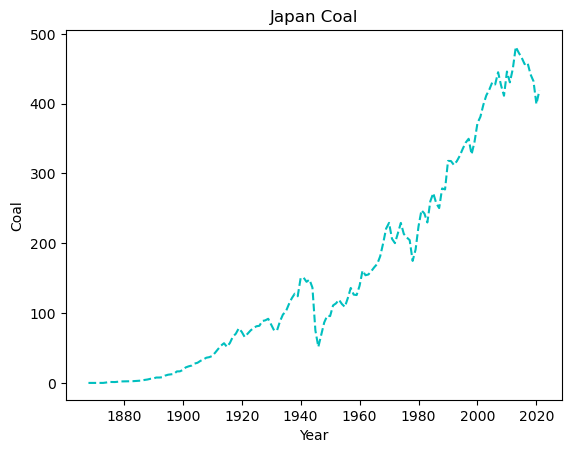

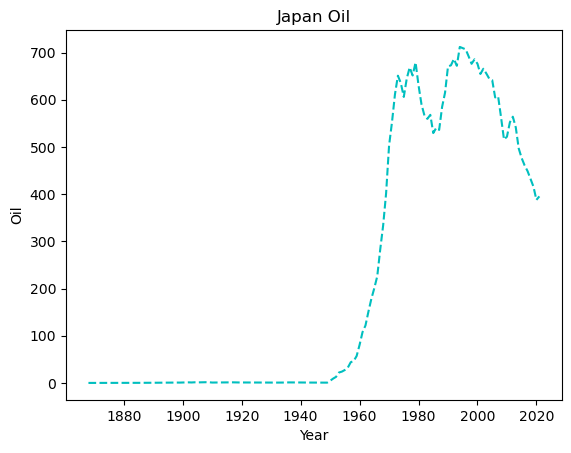

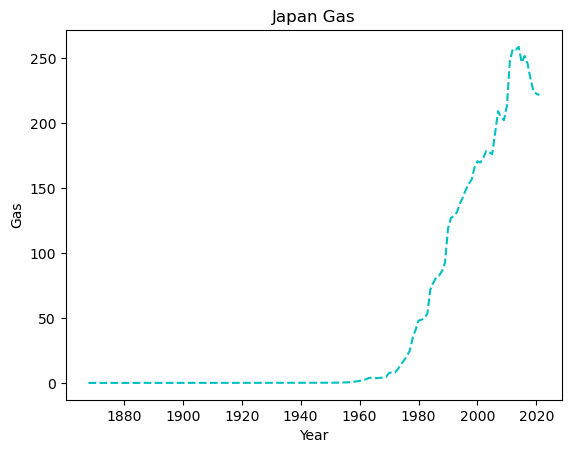

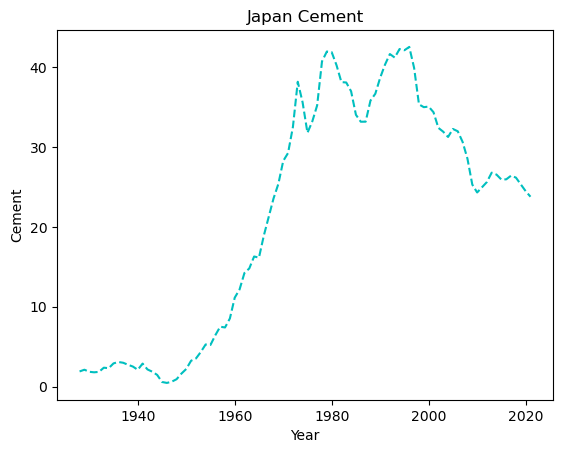

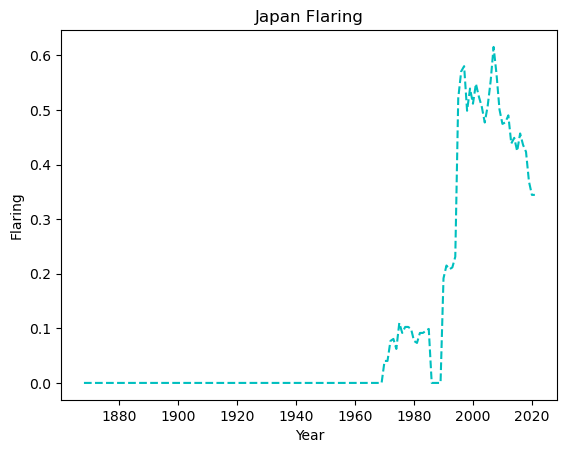

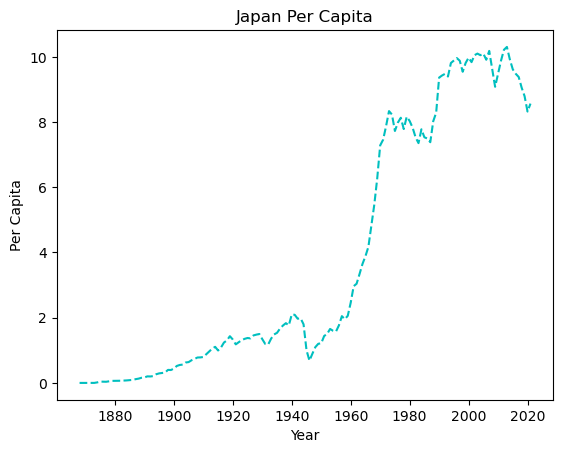

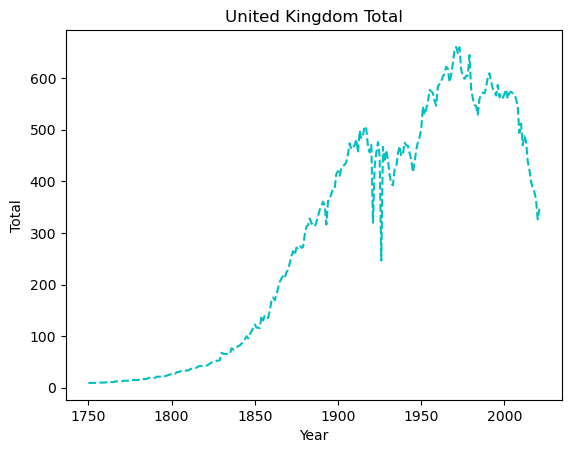

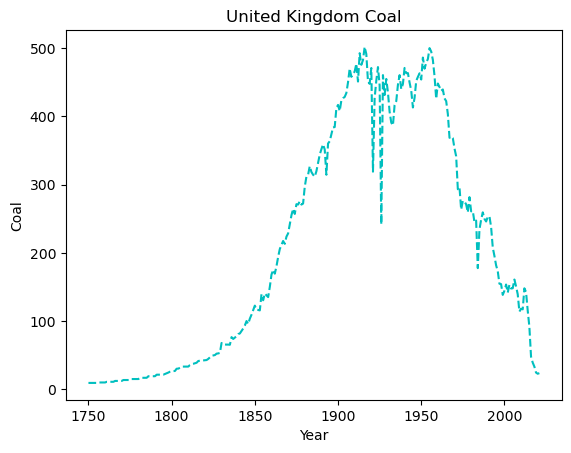

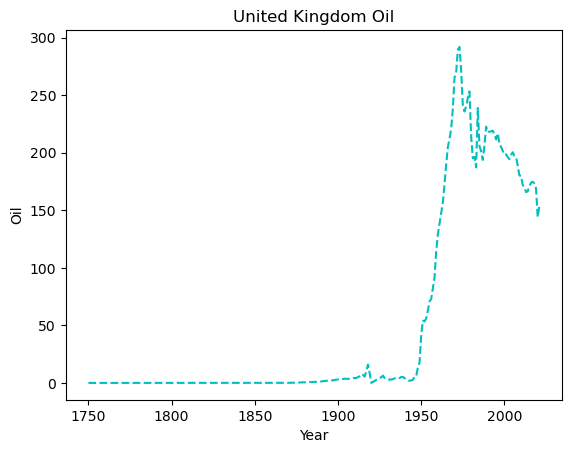

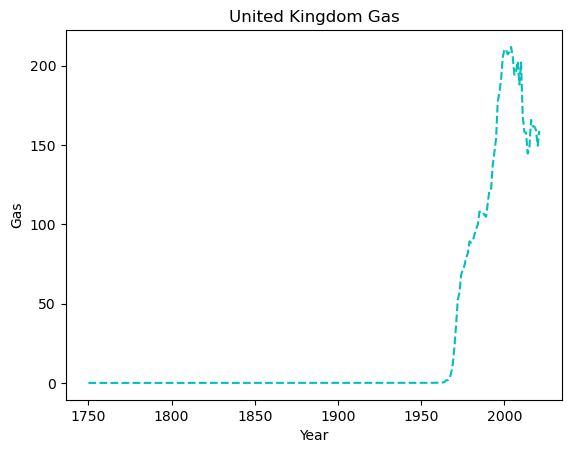

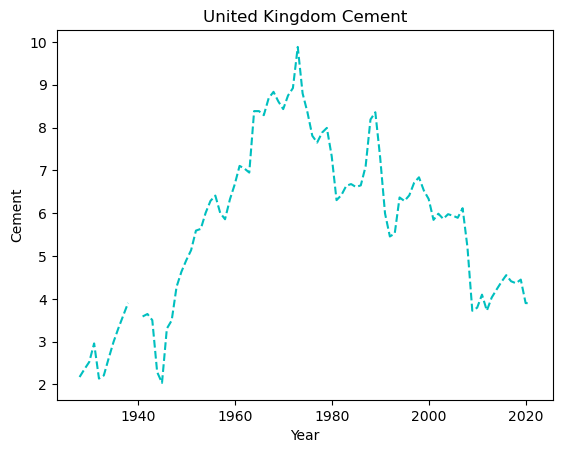

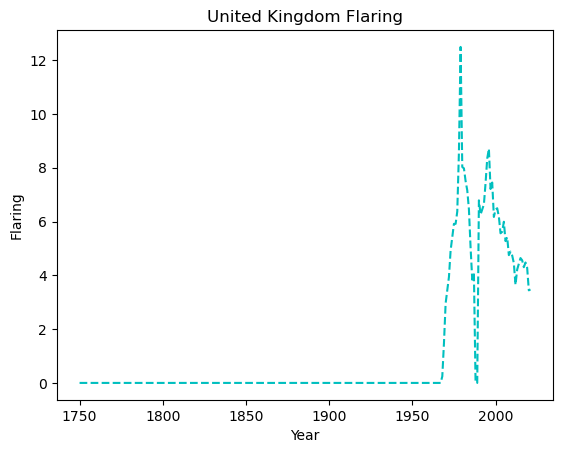

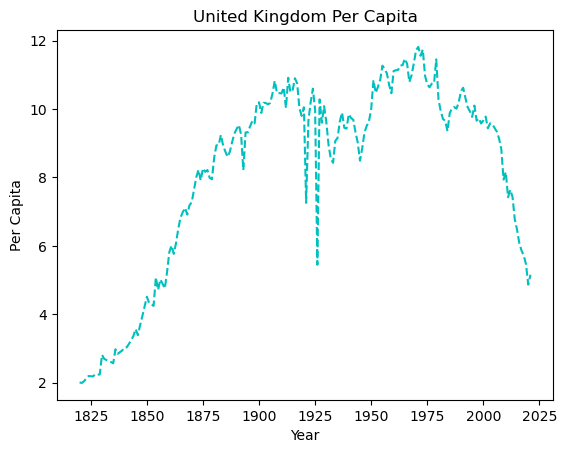

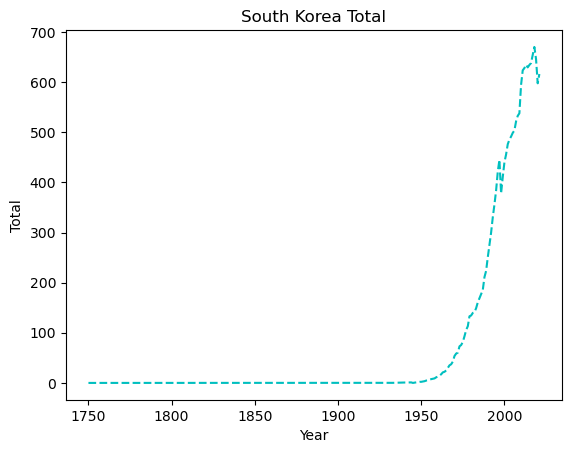

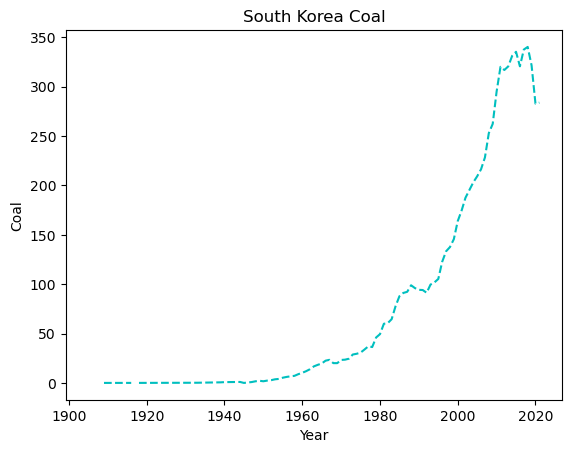

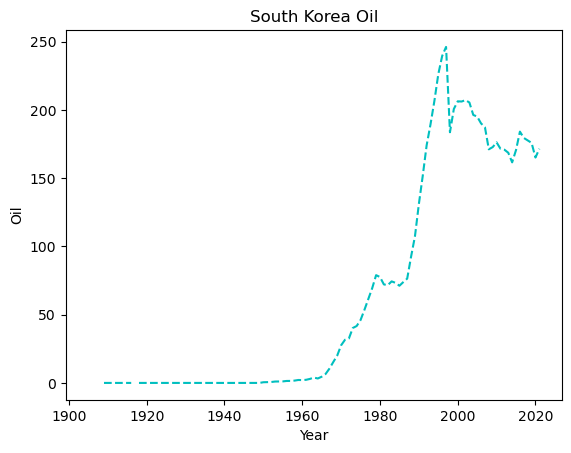

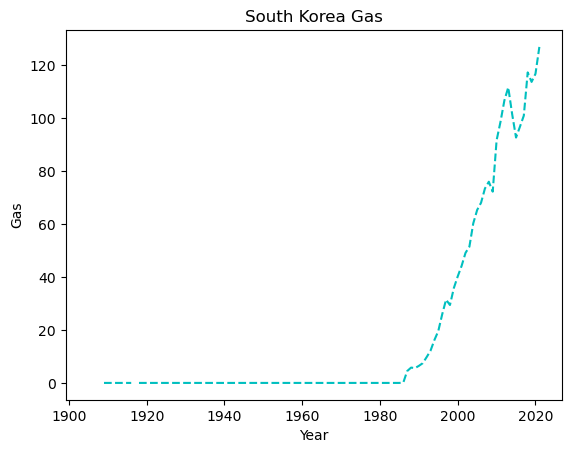

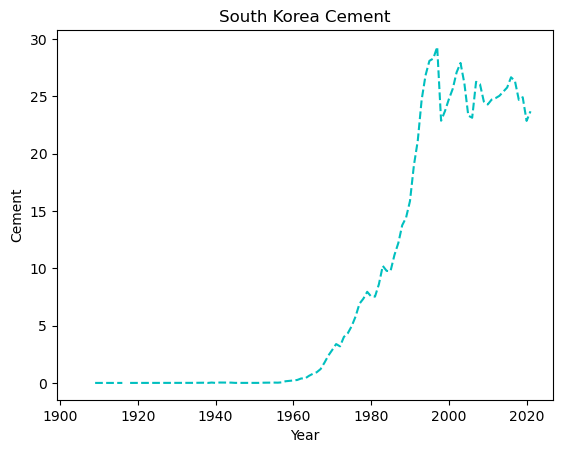

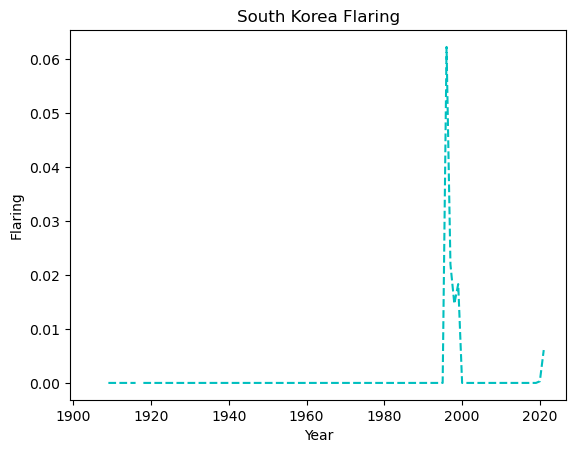

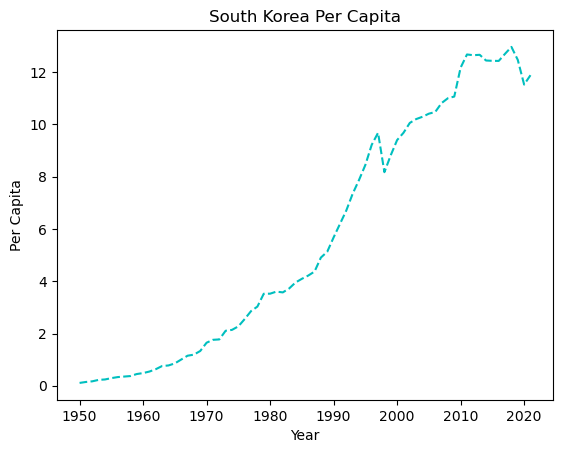

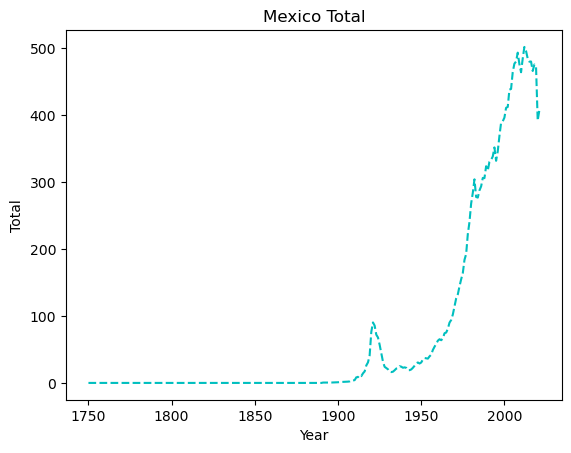

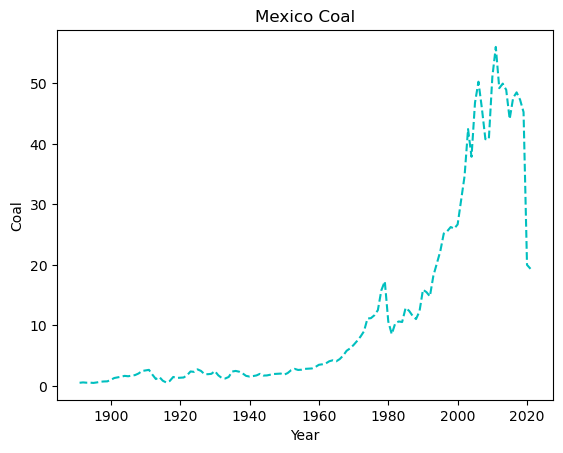

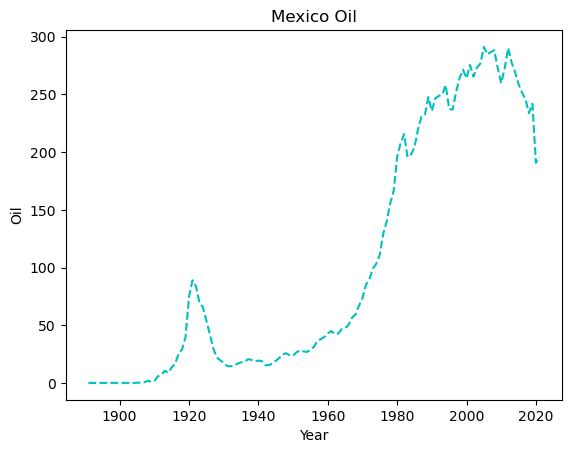

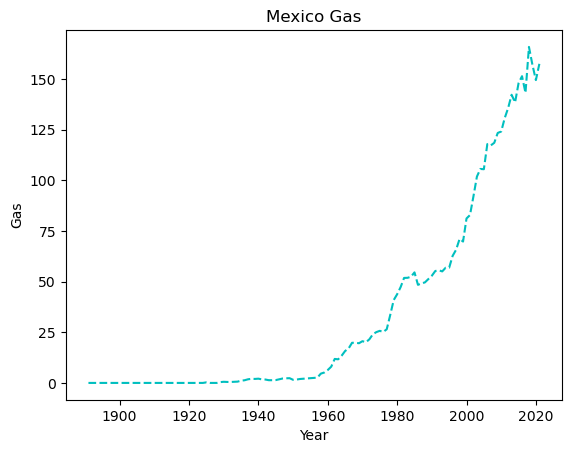

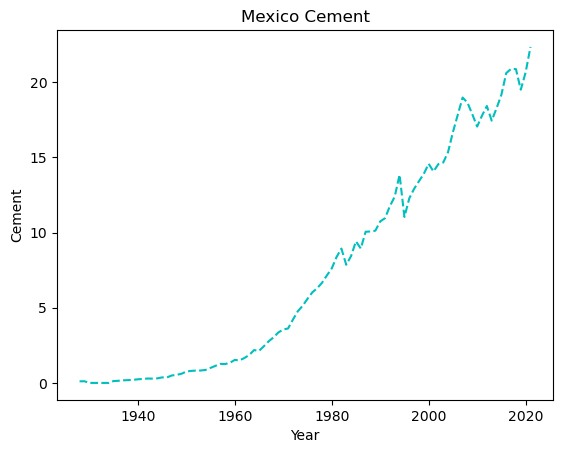

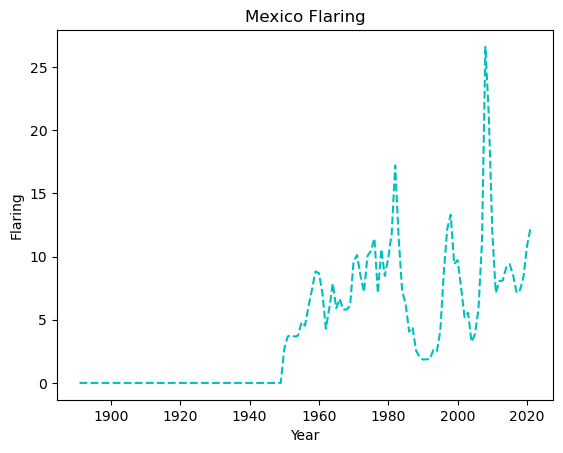

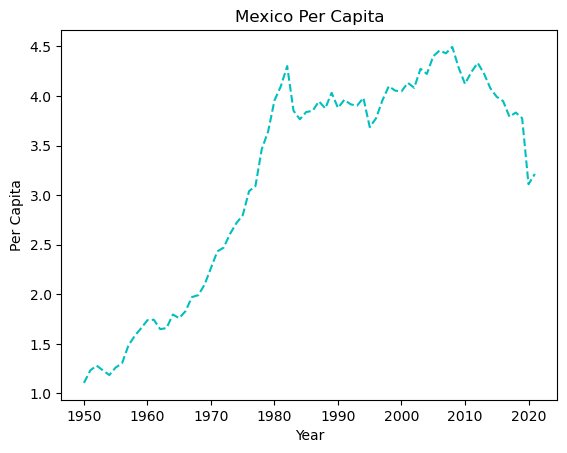

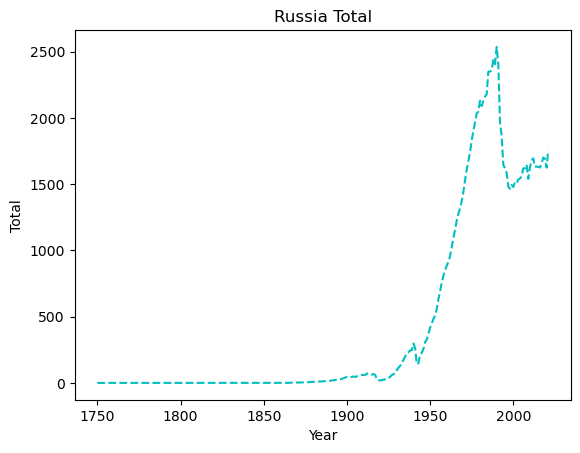

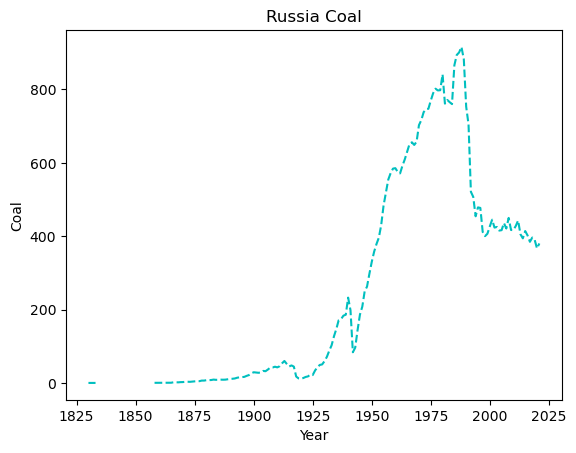

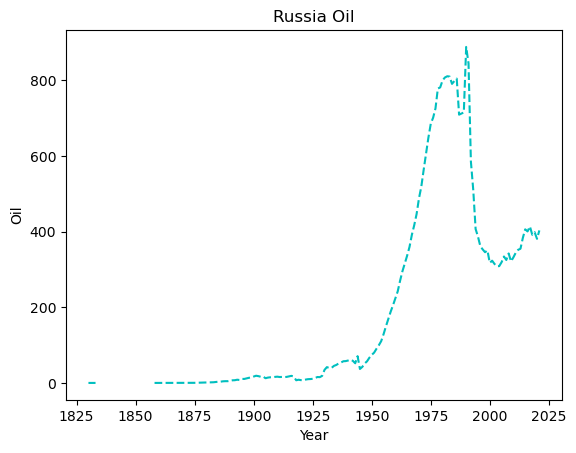

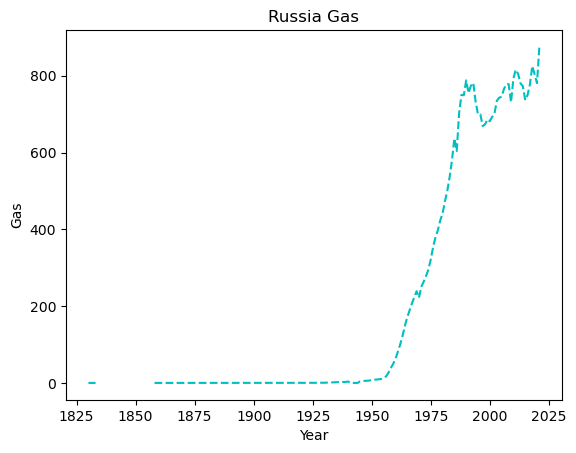

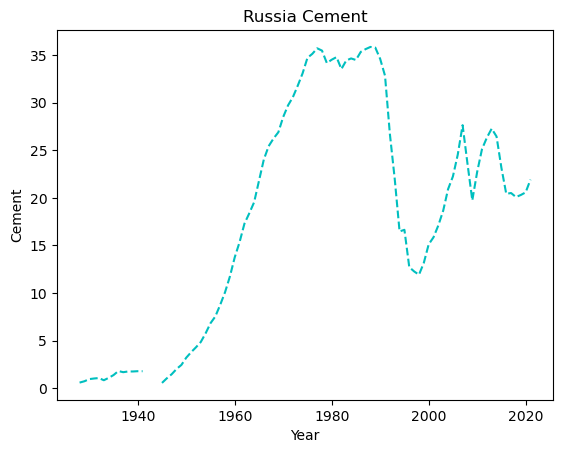

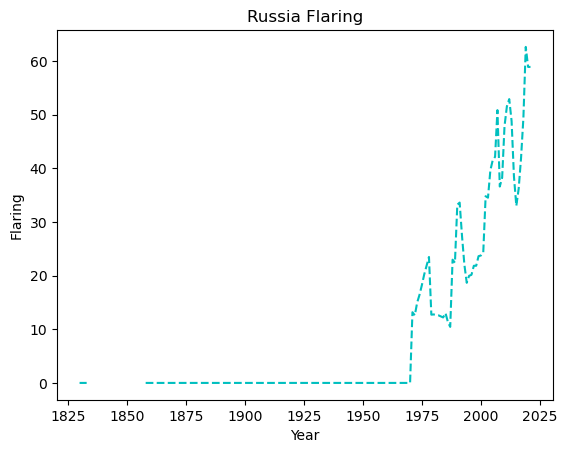

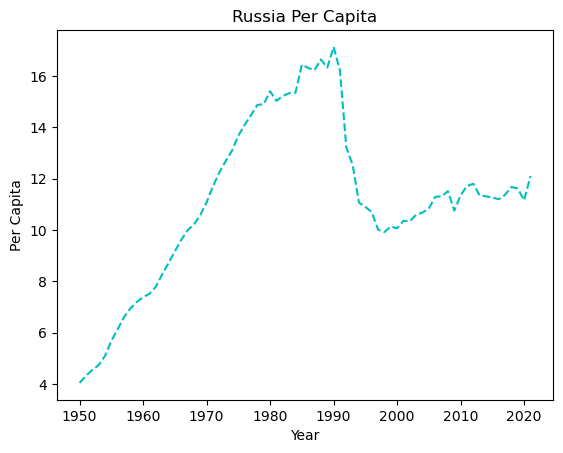

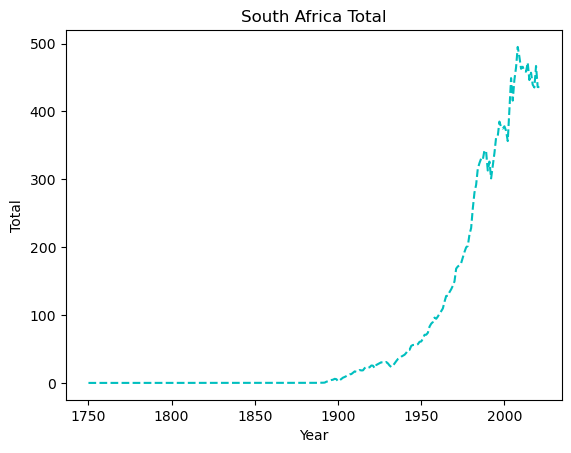

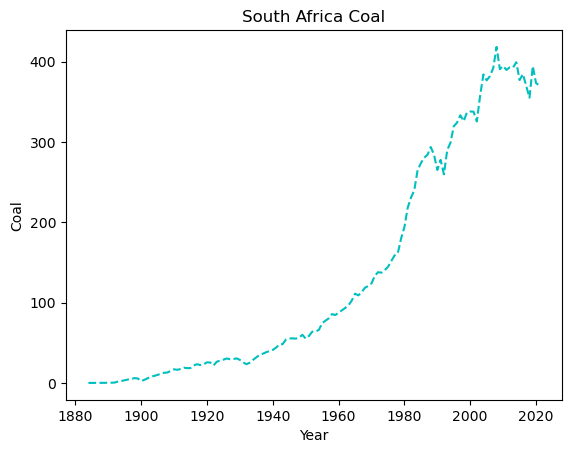

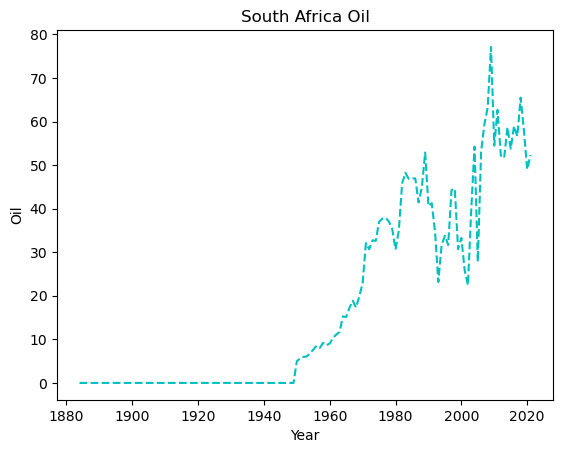

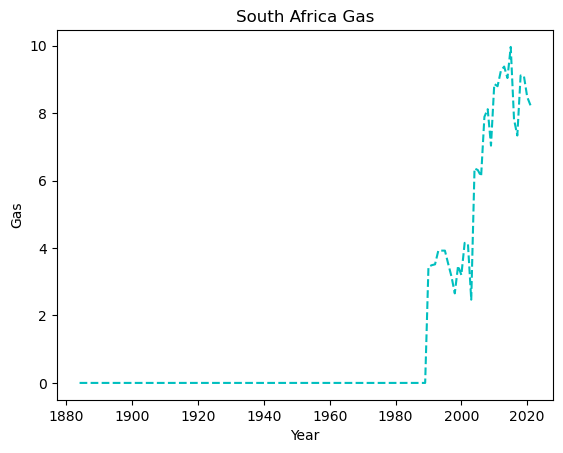

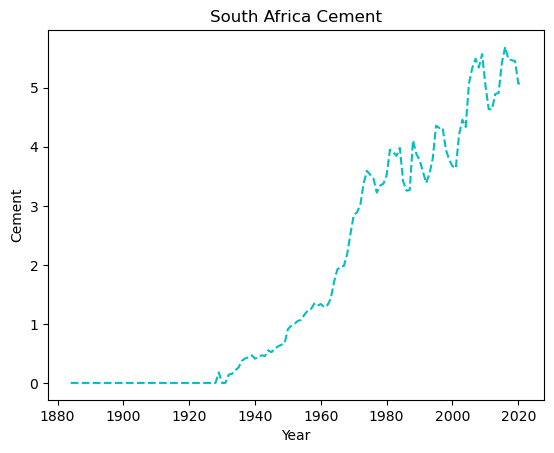

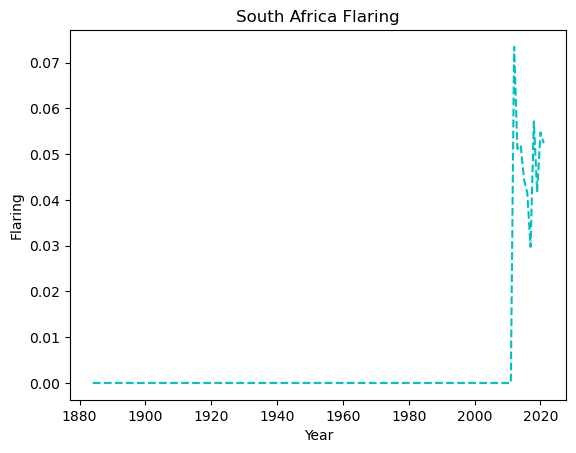

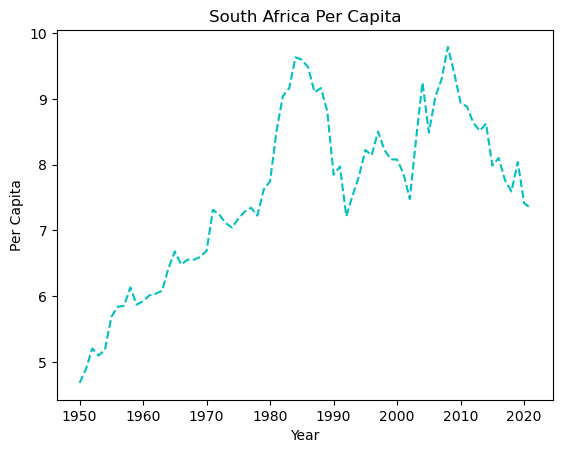

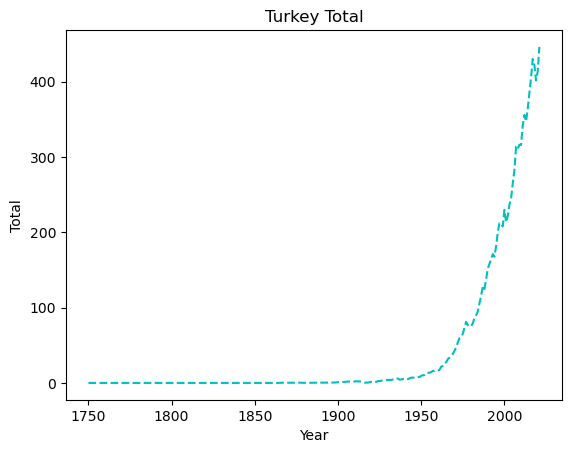

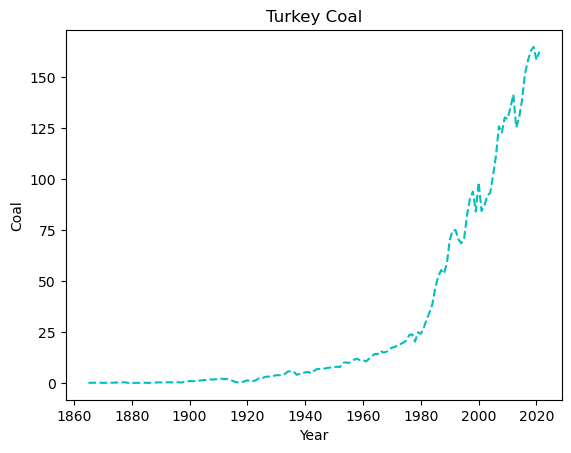

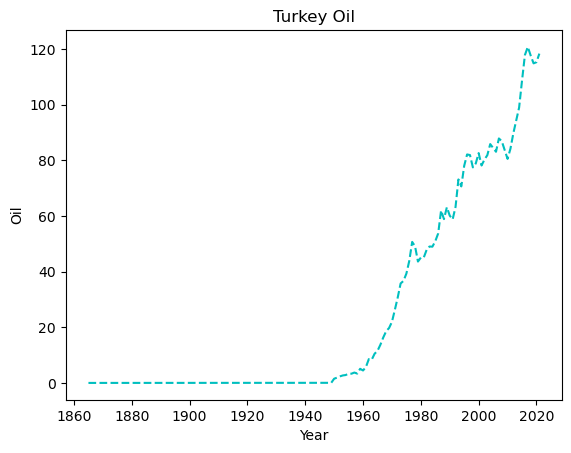

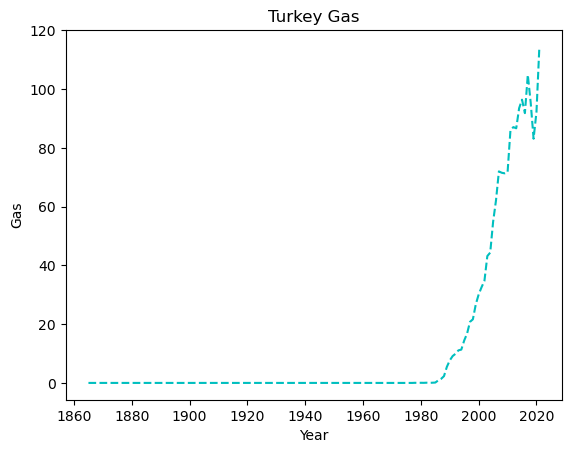

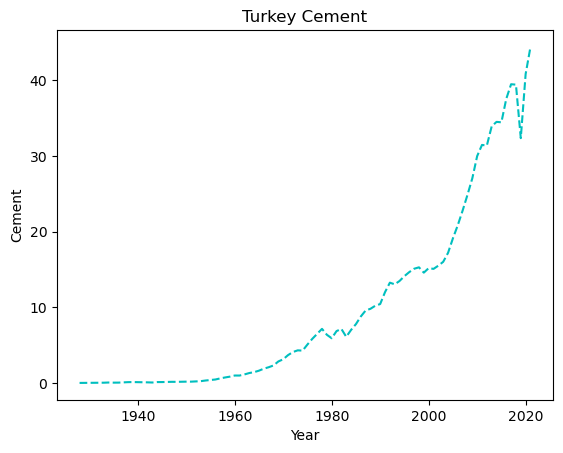

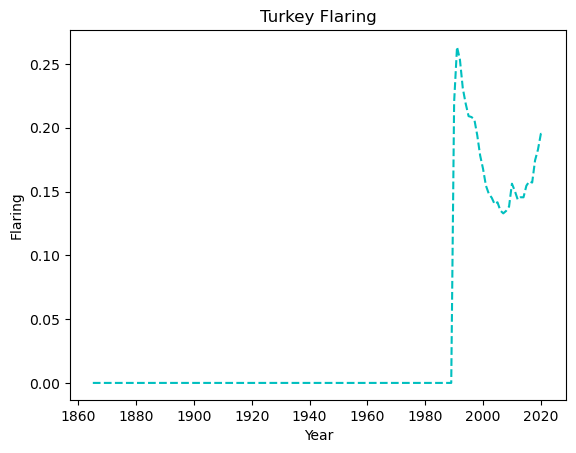

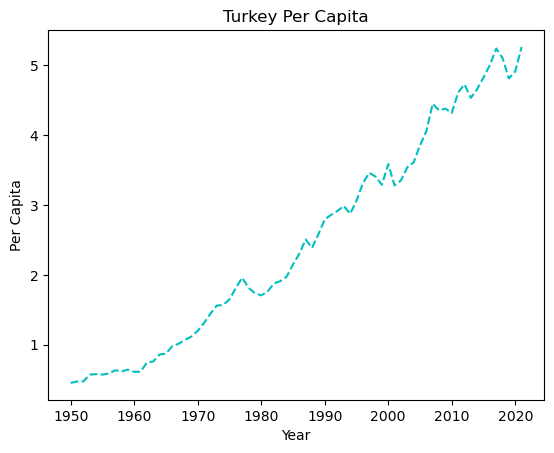

In [19]:
#Grafica por pais.
for j in range(len(G20)):
    aux = df.loc[df['Country']==G20[j]]
    for i in range(len(Columnas)):
        auxi =  aux[Columnas[i]]
        A_auxi = auxi.to_numpy()
        Y = aux['Year'].to_numpy()
        plt.plot(Y,A_auxi,'c--')
        plt.xlabel('Year')
        plt.ylabel(Columnas[i])
        plt.title(G20[j]+' '+Columnas[i])
        plt.show()

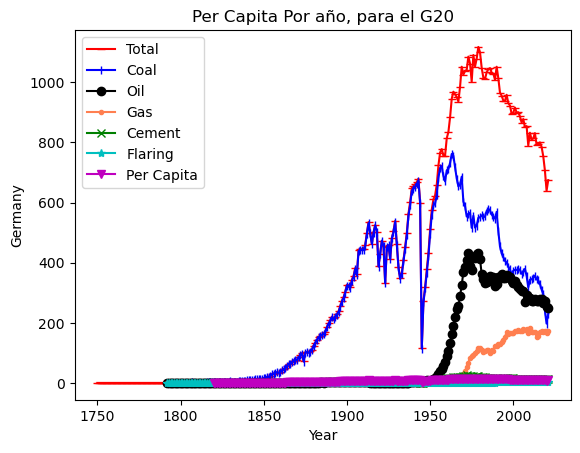

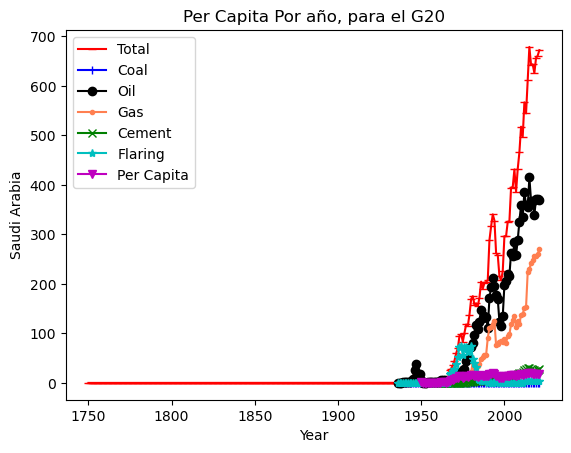

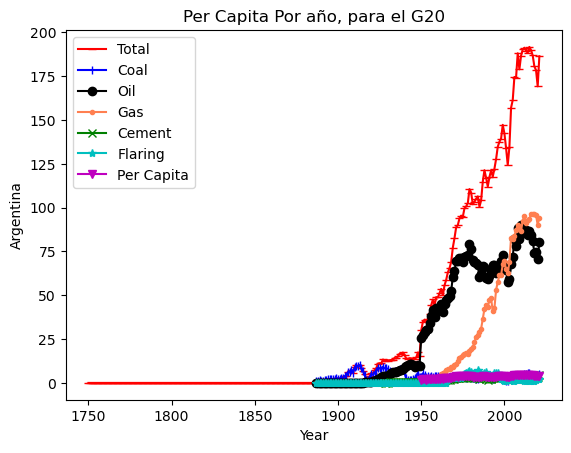

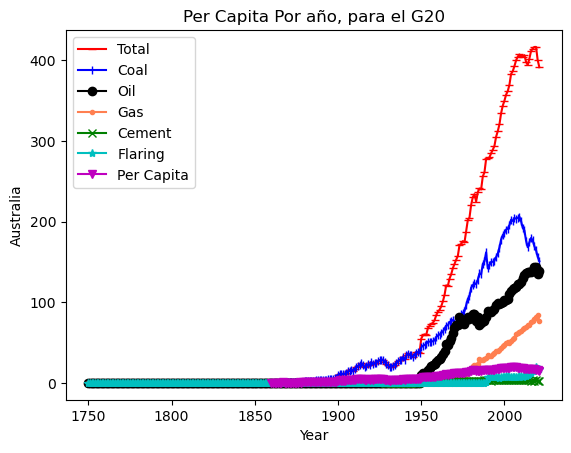

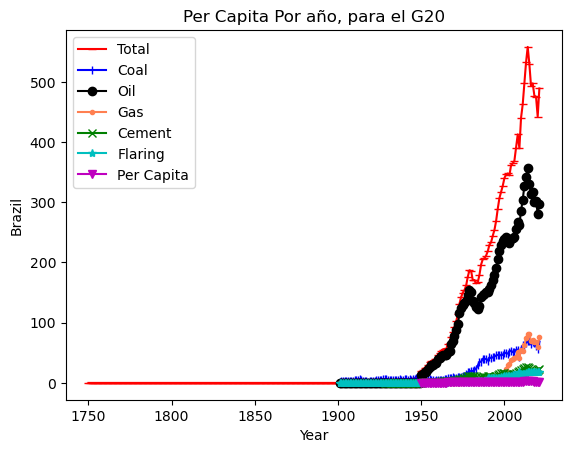

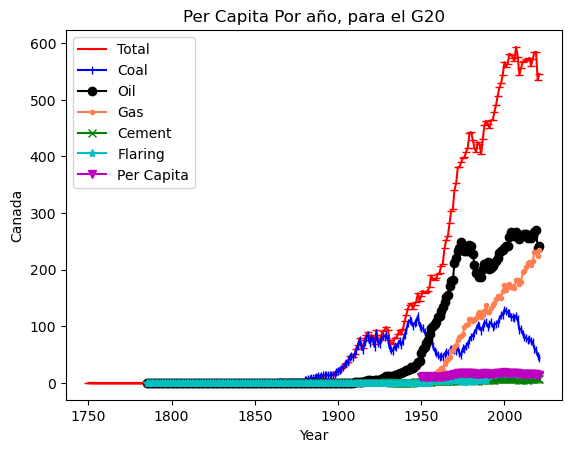

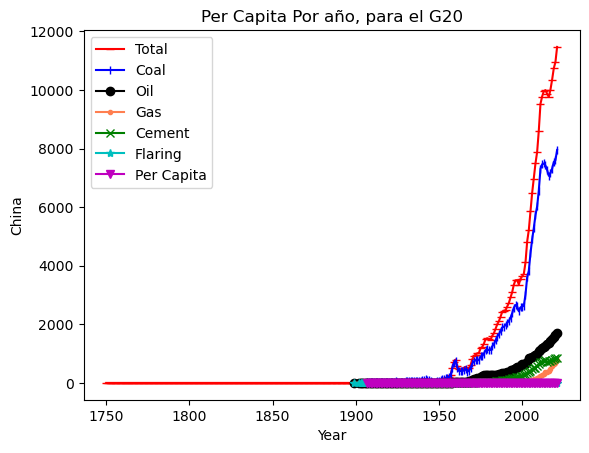

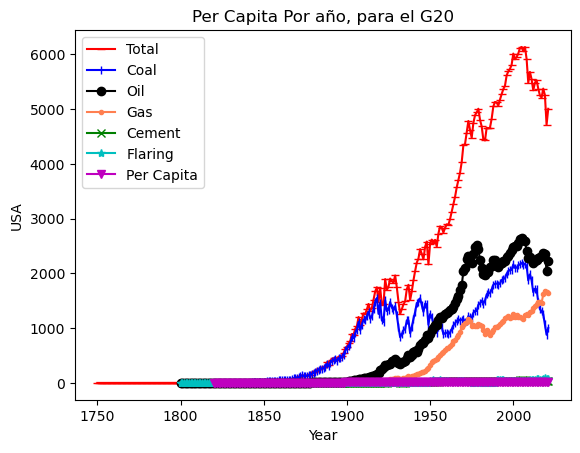

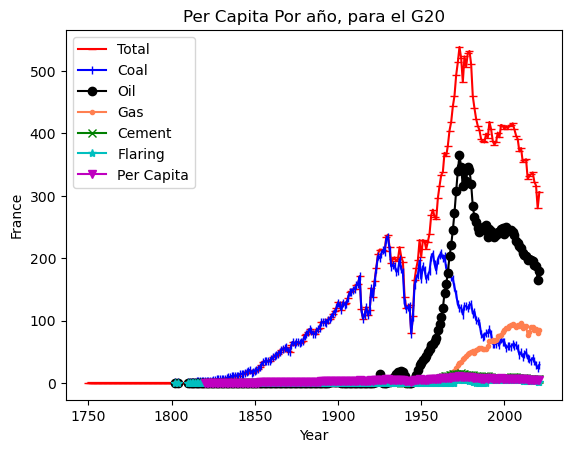

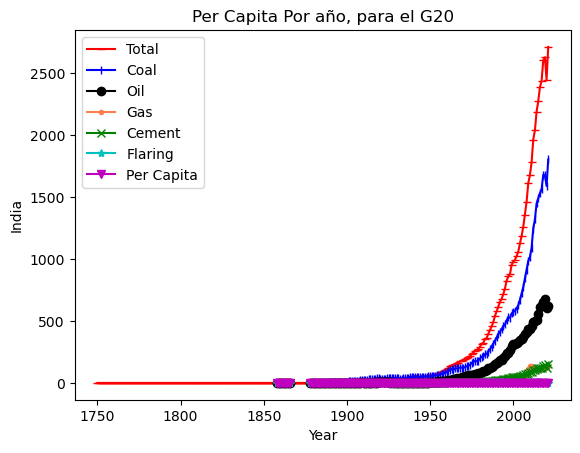

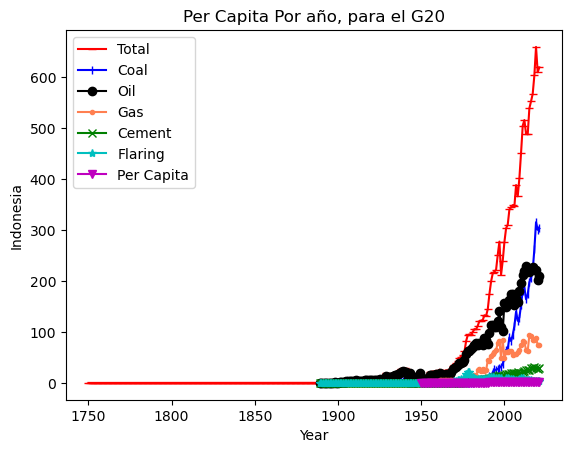

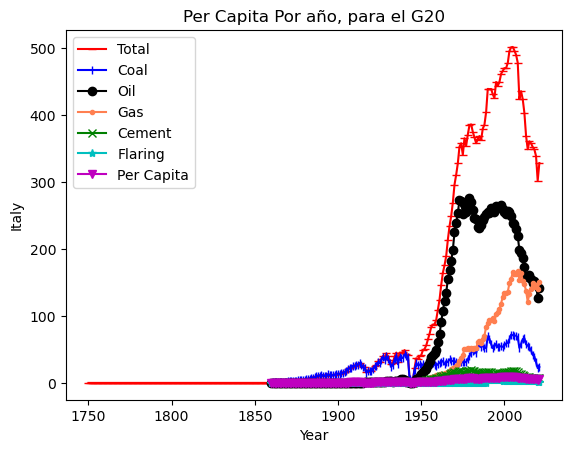

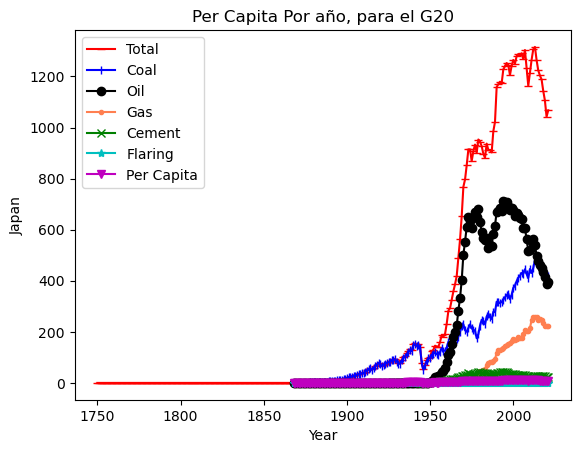

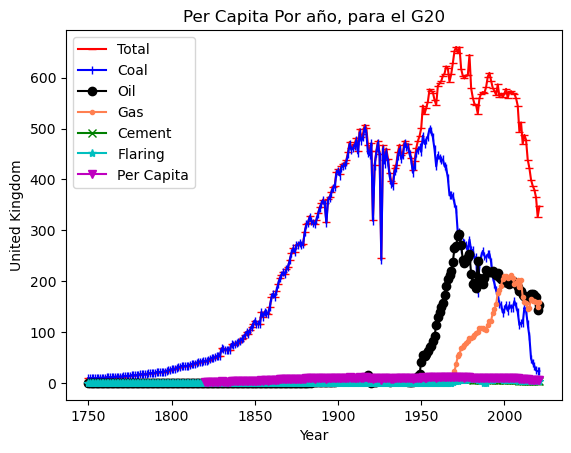

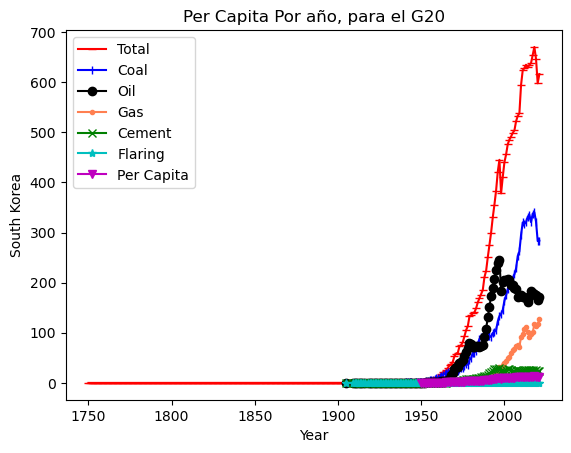

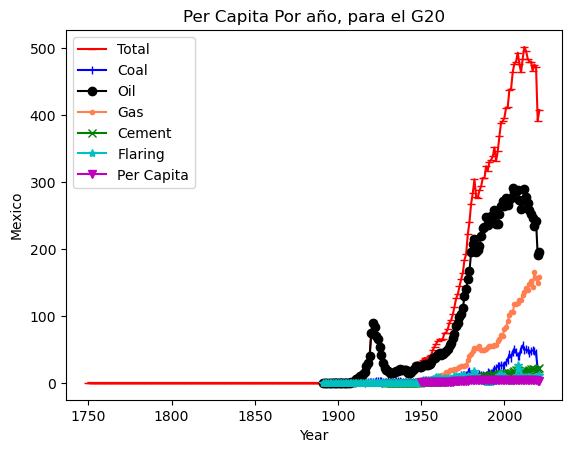

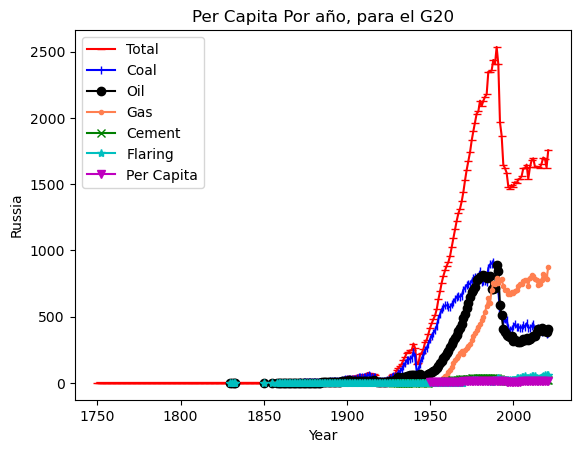

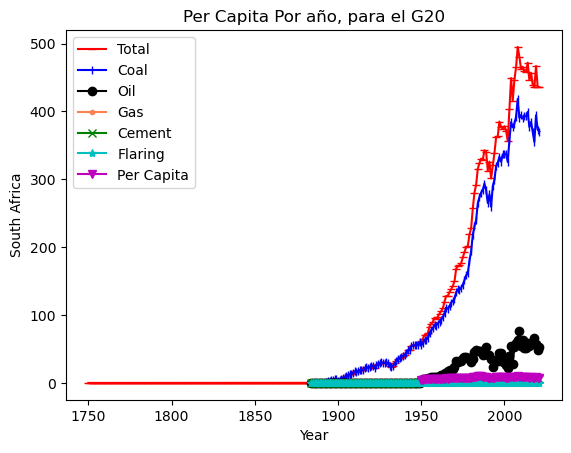

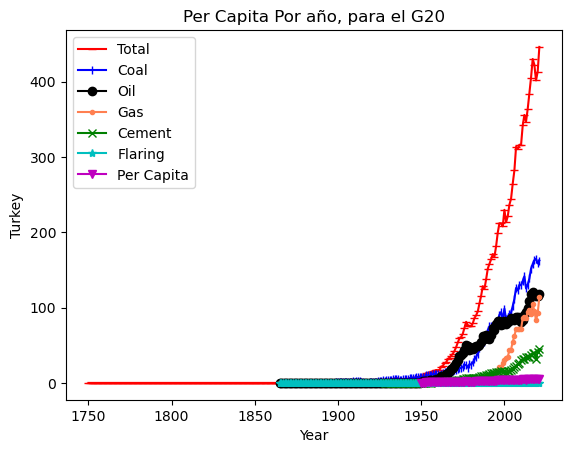

In [20]:
#Grafica comparativa de contaminacion del g20
marcadores = ["_",'|','o','.','x','*','v','^','<','>','1','2','3','4','8','s','p','P','X','+']
colores = ['r','b','k','coral','g','c','m','y','brown','firebrick','olive','limegreen','azure','darkgreen','orange','navy','rebeccapurple','plum','indigo','teal']
for j in range(len(G20)):
    aux = df.loc[df['Country']==G20[j]]
    for i in range(len(Columnas)):
        auxi =  aux[Columnas[i]]
        A_auxi = auxi.to_numpy()
        Y = aux['Year'].to_numpy()
        plt.plot(Y, A_auxi,color=colores[i], marker=marcadores[i],label=Columnas[i])
        plt.xlabel('Year')
        plt.ylabel(G20[j])
        plt.legend(loc = "upper left")
        plt.title(Columnas[i]+' Por año, para el G20')
    plt.show()

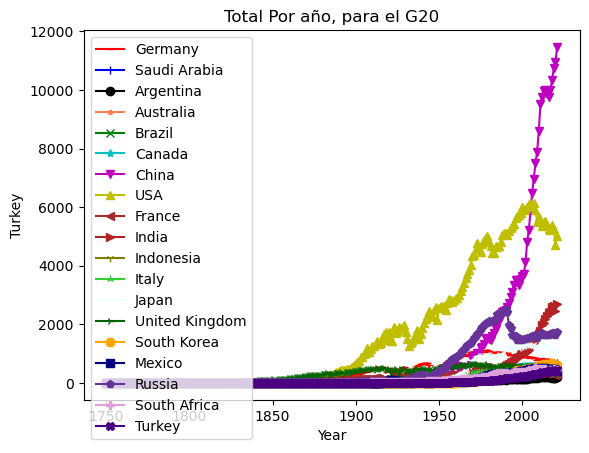

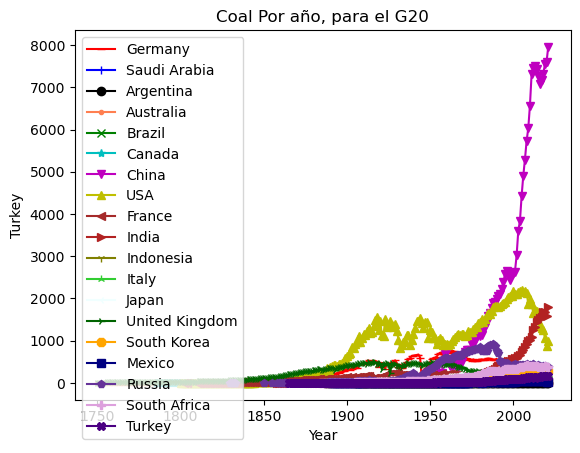

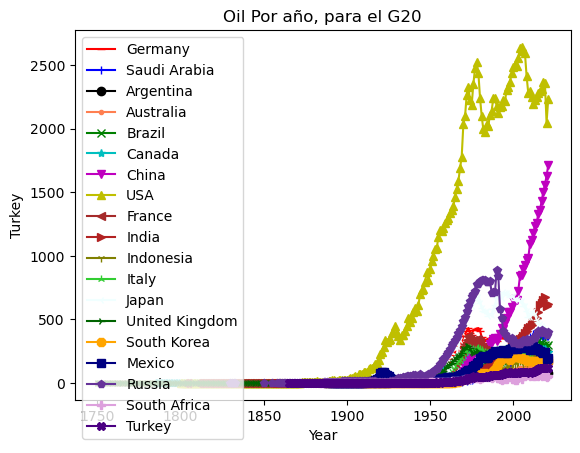

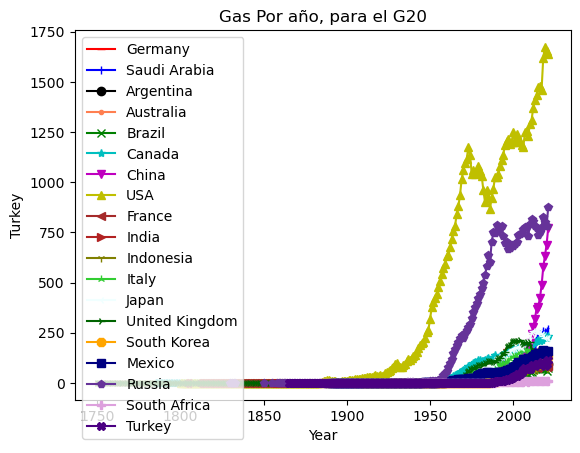

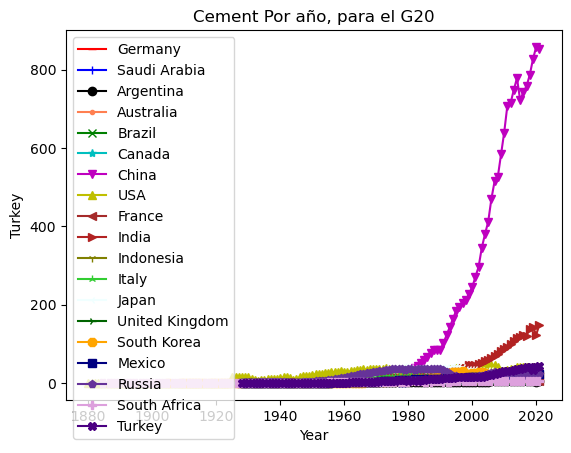

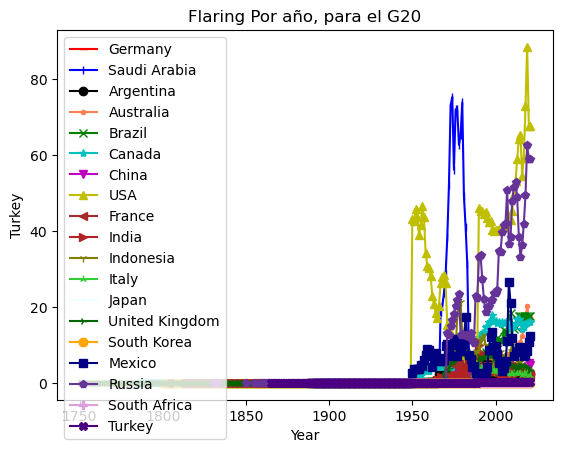

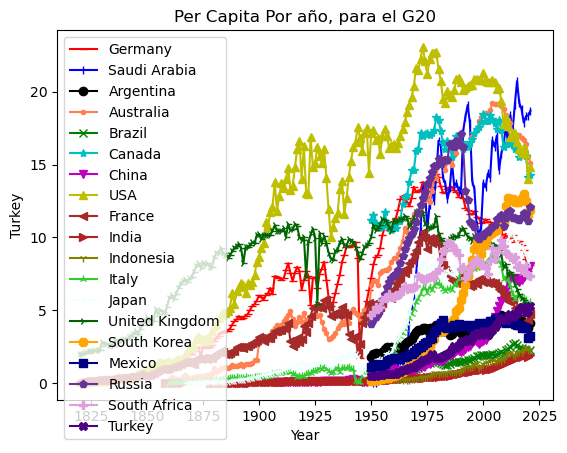

In [21]:
for i in range(len(Columnas)):
    for j in range(len(G20)):
        aux = df.loc[df['Country']==G20[j]]
        auxi =  aux[Columnas[i]]
        A_auxi = auxi.to_numpy()
        Y = aux['Year'].to_numpy()
        plt.plot(Y, A_auxi,color=colores[j], marker=marcadores[j],label=G20[j])
        plt.xlabel('Year')
        plt.ylabel(G20[j])
        plt.legend(loc = "upper left")
        plt.title(Columnas[i]+' Por año, para el G20')
    plt.show()

In [22]:
# Crear una copia del dataframe filtrado
df_G20 = df[df['Country'].isin(G20)].copy()
df_G20

Country ISO 3166-1 alpha-3  Year        Total         Coal  \
2176   Argentina                ARG  1750     0.000000          NaN   
2177   Argentina                ARG  1751     0.000000          NaN   
2178   Argentina                ARG  1752     0.000000          NaN   
2179   Argentina                ARG  1753     0.000000          NaN   
2180   Argentina                ARG  1754     0.000000          NaN   
...          ...                ...   ...          ...          ...   
60107        USA                USA  2017  5210.957584  1308.479533   
60108        USA                USA  2018  5376.657233  1256.201494   
60109        USA                USA  2019  5259.143836  1070.723931   
60110        USA                USA  2020  4715.691109   878.972885   
60111        USA                USA  2021  5007.335889  1002.299987   

               Oil          Gas     Cement    Flaring      Other  Per Capita  
2176           NaN          NaN        NaN        NaN        NaN         NaN  
2177           NaN          NaN        NaN        NaN        NaN         NaN  
2178           NaN          NaN        NaN        NaN        NaN         NaN  
2179           NaN          NaN        NaN        NaN        NaN         NaN  
2180           NaN          NaN        NaN        NaN        NaN         NaN  
...            ...          ...        ...        ...        ...         ...  
60107  2314.675386  1460.391796  40.323535  59.245489  27.841845   15.800777  
60108  2365.283480  1618.720337  38.970745  72.786925  24.694251   16.187923  
60109  2358.831137  1673.999100  40.895869  88.383147  26.310652   15.730884  
60110  2049.336500  1653.677852  40.687747  67.684371  25.331754   14.037218  
60111  2233.778180  1637.038462  41.203135  67.684371  25.331754   14.858668  

[5168 rows x 11 columns]

In [23]:
for i in range(len(Columnas)):
    df_grouped = df_G20.groupby(['Country'])[Columnas[i]].max().reset_index()

    # Encontrar los tres valores diferentes con el máximo desempeño
    top_3 = df_grouped.nlargest(3, Columnas[i])

    # Imprimir el resultado
    print('El top 3 para ', Columnas[i],' es:\n ',top_3)

El top 3 para  Total  es:
     Country         Total
4    China  11472.369171
17     USA   6137.603445
7    India   2709.683625
El top 3 para  Coal  es:
     Country         Coal
4    China  7955.985419
17     USA  2189.646259
7    India  1802.311897
El top 3 para  Oil  es:
     Country          Oil
17     USA  2644.236598
4    China  1713.339980
12  Russia   888.018985
El top 3 para  Gas  es:
     Country          Gas
17     USA  1673.999100
12  Russia   875.051751
4    China   773.866062
El top 3 para  Cement  es:
     Country      Cement
4    China  858.232613
7    India  149.001244
17     USA   46.850744
El top 3 para  Flaring  es:
           Country    Flaring
17           USA  88.383147
13  Saudi Arabia  75.185280
12        Russia  62.654678
El top 3 para  Per Capita  es:
           Country  Per Capita
17           USA   23.081082
13  Saudi Arabia   20.728320
1      Australia   19.213040
